In [32]:
import pandas as pd

df = pd.read_csv(r'C:\Users\clint\Desktop\RER\Code\22.csv')
df

,Sending_Country,Receiving_Country,Year,Value,Unit,Source,Region,Sending_Country_Code,Receiving_Country_Code,Sending_Country_GDP,Receiving_Country_GDP
0,Algeria,Senegal,2021,0.183414825,USD millions,BCEAO,Africa,DZA,SEN,1.994889e+05,2.435960e+04
1,Australia,Ethiopia,2020,13.59617511,USD millions,National Bank of Ethiopia,Africa,AUS,ETH,1.491063e+06,9.507178e+04
2,Australia,Kenya,2024,"184,497.099695719",USD millions,Central Bank of Kenya,Africa,AUS,KEN,1.665258e+06,1.045752e+05
3,Australia,Uganda,2022,22,USD millions,Bank of Uganda,Africa,AUS,UGA,1.587133e+06,4.414722e+04
4,Austria,Kenya,2024,"13,169.065145833",USD millions,Central Bank of Kenya,Africa,AUT,KEN,4.181904e+05,1.045752e+05
...,...,...,...,...,...,...,...,...,...,...,...
3975,Suriname,United States,2019,5.022,USD millions,Roland Kpodar (IMF),North America,SUR,USA,5.256434e+03,2.015964e+07
3976,Suriname,United States,2020,3.275,USD millions,Roland Kpodar (IMF),North America,SUR,USA,4.416708e+03,1.972358e+07
3977,Suriname,Vietnam,2018,1.401,USD millions,Roland Kpodar (IMF),Asia,SUR,VNM,5.195769e+03,2.933586e+05
3978,Suriname,Vietnam,2019,1.453,USD millions,Roland Kpodar (IMF),Asia,SUR,VNM,5.256434e+03,3.149476e+05


In [33]:
# Aggregate remittances by receiving country and year
# Convert Value column to numeric in case there are any string values with commas
df['Value'] = pd.to_numeric(df['Value'].astype(str).str.replace(',', ''), errors='coerce')

# Group by Receiving_Country and Year, then sum the Value column
remittances_by_country_year = df.groupby(['Receiving_Country', 'Year'])['Value'].sum().reset_index()

# Sort by country and year for better readability
remittances_by_country_year = remittances_by_country_year.sort_values(['Receiving_Country', 'Year'])

print("Total remittances received by country and year:")
print(f"Dataset shape: {remittances_by_country_year.shape}")
remittances_by_country_year

Total remittances received by country and year:
Dataset shape: (659, 3)


,Receiving_Country,Year,Value
0,Afghanistan,2018,0.048635
1,Afghanistan,2019,0.032250
2,Afghanistan,2020,0.040370
3,Albania,2018,0.033066
4,Albania,2019,0.047893
...,...,...,...
654,Zambia,2019,0.001165
655,Zambia,2020,0.000978
656,Zimbabwe,2018,0.008487
657,Zimbabwe,2019,0.000353


In [34]:
# Let's examine some key statistics about the aggregated data
print("=== AGGREGATED REMITTANCES DATA SUMMARY ===")
print(f"Total number of country-year combinations: {len(remittances_by_country_year)}")
print(f"Number of unique receiving countries: {remittances_by_country_year['Receiving_Country'].nunique()}")
print(f"Years covered: {remittances_by_country_year['Year'].min()} - {remittances_by_country_year['Year'].max()}")
print()

# Show top 10 countries by total remittances received across all years
print("=== TOP 10 COUNTRIES BY TOTAL REMITTANCES (ALL YEARS) ===")
top_countries_total = remittances_by_country_year.groupby('Receiving_Country')['Value'].sum().sort_values(ascending=False).head(10)
print(top_countries_total)
print()

# Show top 10 country-year combinations with highest remittances
print("=== TOP 10 COUNTRY-YEAR COMBINATIONS BY REMITTANCES ===")
top_country_years = remittances_by_country_year.nlargest(10, 'Value')[['Receiving_Country', 'Year', 'Value']]
print(top_country_years.to_string(index=False))

=== AGGREGATED REMITTANCES DATA SUMMARY ===
Total number of country-year combinations: 659
Number of unique receiving countries: 214
Years covered: 2018 - 2024

=== TOP 10 COUNTRIES BY TOTAL REMITTANCES (ALL YEARS) ===
Receiving_Country
Kenya                 1.964197e+06
Philippines           8.417635e+04
Pakistan              5.855140e+04
Mexico                5.784990e+04
Dominican Republic    3.034237e+04
Brazil                1.195433e+04
Costa Rica            9.459438e+03
Haiti                 9.330508e+03
Jamaica               9.010509e+03
Colombia              8.906852e+03
Name: Value, dtype: float64

=== TOP 10 COUNTRY-YEAR COMBINATIONS BY REMITTANCES ===
 Receiving_Country  Year        Value
             Kenya  2024 1.964174e+06
            Mexico  2022 5.784981e+04
       Philippines  2019 2.948585e+04
       Philippines  2018 2.832551e+04
       Philippines  2020 2.636499e+04
          Pakistan  2020 2.286901e+04
          Pakistan  2019 1.899832e+04
          Pakistan  2018

In [35]:
df_imf_wb = pd.read_csv(r'C:\Users\clint\Desktop\RER\data\Remittance_4\IMF_WB_Remitance.csv')
df_imf_wb

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,Aruba,ABW,"Personal remittances, received (current US$)",BX.TRF.PWKR.CD.DT,NaN,NaN,NaN,NaN,NaN,NaN,...,5.364010e+07,5.268434e+07,5.614049e+07,3.692030e+07,3.426402e+07,3.498404e+07,3.584564e+07,3.827949e+07,3.896426e+07,NaN
1,Africa Eastern and Southern,AFE,"Personal remittances, received (current US$)",BX.TRF.PWKR.CD.DT,NaN,NaN,NaN,NaN,NaN,NaN,...,1.096848e+10,1.018386e+10,1.067495e+10,1.495713e+10,1.435823e+10,1.371383e+10,1.686042e+10,2.033688e+10,2.146509e+10,1.778441e+09
2,Afghanistan,AFG,"Personal remittances, received (current US$)",BX.TRF.PWKR.CD.DT,NaN,NaN,NaN,NaN,NaN,NaN,...,3.486247e+08,6.277108e+08,8.227316e+08,8.035465e+08,8.285719e+08,7.889171e+08,3.200000e+08,3.200000e+08,3.200000e+08,NaN
3,Africa Western and Central,AFW,"Personal remittances, received (current US$)",BX.TRF.PWKR.CD.DT,NaN,NaN,NaN,NaN,NaN,NaN,...,3.121737e+10,2.842870e+10,3.160172e+10,3.456413e+10,3.497810e+10,2.922822e+10,3.051264e+10,3.265741e+10,3.317461e+10,2.215785e+10
4,Angola,AGO,"Personal remittances, received (current US$)",BX.TRF.PWKR.CD.DT,NaN,NaN,NaN,NaN,NaN,NaN,...,1.111471e+07,3.988048e+06,1.418196e+06,1.579247e+06,3.445473e+06,8.053051e+06,1.263115e+07,1.400549e+07,1.206657e+07,1.410659e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,Kosovo,XKX,"Personal remittances, received (current US$)",BX.TRF.PWKR.CD.DT,NaN,NaN,NaN,NaN,NaN,NaN,...,9.714164e+08,9.857985e+08,1.112078e+09,1.235728e+09,1.248991e+09,1.436088e+09,1.695070e+09,1.612854e+09,1.832627e+09,NaN
262,"Yemen, Rep.",YEM,"Personal remittances, received (current US$)",BX.TRF.PWKR.CD.DT,NaN,NaN,NaN,NaN,NaN,NaN,...,3.350500e+09,3.770584e+09,3.770584e+09,3.770584e+09,3.770584e+09,3.770584e+09,3.770584e+09,3.770584e+09,3.770584e+09,NaN
263,South Africa,ZAF,"Personal remittances, received (current US$)",BX.TRF.PWKR.CD.DT,NaN,NaN,NaN,NaN,NaN,NaN,...,8.252535e+08,7.554340e+08,8.738612e+08,9.290434e+08,8.900593e+08,8.108816e+08,9.266508e+08,8.728556e+08,8.033856e+08,8.553747e+08
264,Zambia,ZMB,"Personal remittances, received (current US$)",BX.TRF.PWKR.CD.DT,NaN,NaN,NaN,NaN,NaN,NaN,...,4.704654e+07,3.846444e+07,9.364410e+07,1.069656e+08,9.825912e+07,1.348648e+08,2.397094e+08,2.434860e+08,2.456881e+08,NaN


In [36]:
# Examine the structure of df_imf_wb to understand its columns
print("=== DF_IMF_WB DATASET STRUCTURE ===")
print(f"Shape: {df_imf_wb.shape}")
print(f"Columns: {list(df_imf_wb.columns)}")
print("\nFirst few rows:")
df_imf_wb.head()

=== DF_IMF_WB DATASET STRUCTURE ===
Shape: (266, 69)
Columns: ['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code', '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968', '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023', '2024']

First few rows:


,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,Aruba,ABW,"Personal remittances, received (current US$)",BX.TRF.PWKR.CD.DT,NaN,NaN,NaN,NaN,NaN,NaN,...,5.364010e+07,5.268434e+07,5.614049e+07,3.692030e+07,3.426402e+07,3.498404e+07,3.584564e+07,3.827949e+07,3.896426e+07,NaN
1,Africa Eastern and Southern,AFE,"Personal remittances, received (current US$)",BX.TRF.PWKR.CD.DT,NaN,NaN,NaN,NaN,NaN,NaN,...,1.096848e+10,1.018386e+10,1.067495e+10,1.495713e+10,1.435823e+10,1.371383e+10,1.686042e+10,2.033688e+10,2.146509e+10,1.778441e+09
2,Afghanistan,AFG,"Personal remittances, received (current US$)",BX.TRF.PWKR.CD.DT,NaN,NaN,NaN,NaN,NaN,NaN,...,3.486247e+08,6.277108e+08,8.227316e+08,8.035465e+08,8.285719e+08,7.889171e+08,3.200000e+08,3.200000e+08,3.200000e+08,NaN
3,Africa Western and Central,AFW,"Personal remittances, received (current US$)",BX.TRF.PWKR.CD.DT,NaN,NaN,NaN,NaN,NaN,NaN,...,3.121737e+10,2.842870e+10,3.160172e+10,3.456413e+10,3.497810e+10,2.922822e+10,3.051264e+10,3.265741e+10,3.317461e+10,2.215785e+10
4,Angola,AGO,"Personal remittances, received (current US$)",BX.TRF.PWKR.CD.DT,NaN,NaN,NaN,NaN,NaN,NaN,...,1.111471e+07,3.988048e+06,1.418196e+06,1.579247e+06,3.445473e+06,8.053051e+06,1.263115e+07,1.400549e+07,1.206657e+07,1.410659e+07


In [37]:
# Step 1: Add Receiving_Country_Code to remittances_by_country_year
# First, let's get the mapping from the original df
country_code_mapping = df[['Receiving_Country', 'Receiving_Country_Code']].drop_duplicates()
print("Country code mapping sample:")
print(country_code_mapping.head())

# Merge with remittances_by_country_year to add country codes
remittances_with_codes = remittances_by_country_year.merge(
    country_code_mapping, 
    on='Receiving_Country', 
    how='left'
)

print(f"\nRemittances with country codes shape: {remittances_with_codes.shape}")
print("Sample of remittances with codes:")
remittances_with_codes.head()

Country code mapping sample:
  Receiving_Country Receiving_Country_Code
0           Senegal                    SEN
1          Ethiopia                    ETH
2             Kenya                    KEN
3            Uganda                    UGA
7           Morocco                    MAR

Remittances with country codes shape: (659, 4)
Sample of remittances with codes:


,Receiving_Country,Year,Value,Receiving_Country_Code
0,Afghanistan,2018,0.048635,AFG
1,Afghanistan,2019,0.032250,AFG
2,Afghanistan,2020,0.040370,AFG
3,Albania,2018,0.033066,ALB
4,Albania,2019,0.047893,ALB


In [38]:
# Step 2: Transform df_imf_wb from wide to long format
# Identify year columns (should be string representations of years)
year_columns = [col for col in df_imf_wb.columns if col.isdigit()]
print(f"Year columns found: {year_columns[:10]}...")  # Show first 10

# Reshape IMF/WB data to long format
df_imf_wb_long = df_imf_wb.melt(
    id_vars=['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code'],
    value_vars=year_columns,
    var_name='Year',
    value_name='IMF_Value'
)

# Convert Year to integer and filter for our relevant years (2018-2024)
df_imf_wb_long['Year'] = df_imf_wb_long['Year'].astype(int)
df_imf_wb_long = df_imf_wb_long[df_imf_wb_long['Year'].between(2018, 2024)]

# Remove rows with missing IMF_Value
df_imf_wb_long = df_imf_wb_long.dropna(subset=['IMF_Value'])

print(f"\nIMF/WB long format shape: {df_imf_wb_long.shape}")
print("Sample of IMF/WB long format:")
df_imf_wb_long

Year columns found: ['1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968', '1969']...

IMF/WB long format shape: (1648, 6)
Sample of IMF/WB long format:


,Country Name,Country Code,Indicator Name,Indicator Code,Year,IMF_Value
15428,Aruba,ABW,"Personal remittances, received (current US$)",BX.TRF.PWKR.CD.DT,2018,3.692030e+07
15429,Africa Eastern and Southern,AFE,"Personal remittances, received (current US$)",BX.TRF.PWKR.CD.DT,2018,1.495713e+10
15430,Afghanistan,AFG,"Personal remittances, received (current US$)",BX.TRF.PWKR.CD.DT,2018,8.035465e+08
15431,Africa Western and Central,AFW,"Personal remittances, received (current US$)",BX.TRF.PWKR.CD.DT,2018,3.456413e+10
15432,Angola,AGO,"Personal remittances, received (current US$)",BX.TRF.PWKR.CD.DT,2018,1.579247e+06
...,...,...,...,...,...,...
17276,Uzbekistan,UZB,"Personal remittances, received (current US$)",BX.TRF.PWKR.CD.DT,2024,1.657926e+10
17277,St. Vincent and the Grenadines,VCT,"Personal remittances, received (current US$)",BX.TRF.PWKR.CD.DT,2024,9.444387e+07
17283,World,WLD,"Personal remittances, received (current US$)",BX.TRF.PWKR.CD.DT,2024,7.405080e+11
17284,Samoa,WSM,"Personal remittances, received (current US$)",BX.TRF.PWKR.CD.DT,2024,2.822543e+08


In [39]:
# Step 3: Merge the datasets to add IMF_Value column
# Merge based on Country Code and Year
final_comparison = remittances_with_codes.merge(
    df_imf_wb_long[['Country Code', 'Year', 'IMF_Value']],
    left_on=['Receiving_Country_Code', 'Year'],
    right_on=['Country Code', 'Year'],
    how='left'
)

# Drop the duplicate Country Code column
final_comparison = final_comparison.drop('Country Code', axis=1)

# Convert IMF_Value from current US$ to millions of US$ to match our Value column
final_comparison['IMF_Value_Millions'] = final_comparison['IMF_Value'] / 1e6

print("=== FINAL COMPARISON DATASET ===")
print(f"Shape: {final_comparison.shape}")
print(f"Number of matches with IMF data: {final_comparison['IMF_Value'].notna().sum()}")
print(f"Number of records without IMF data: {final_comparison['IMF_Value'].isna().sum()}")

print("\nSample of final comparison dataset:")
final_comparison.head(10)

=== FINAL COMPARISON DATASET ===
Shape: (659, 6)
Number of matches with IMF data: 610
Number of records without IMF data: 49

Sample of final comparison dataset:


,Receiving_Country,Year,Value,Receiving_Country_Code,IMF_Value,IMF_Value_Millions
0,Afghanistan,2018,0.048635,AFG,8.035465e+08,803.546454
1,Afghanistan,2019,0.032250,AFG,8.285719e+08,828.571904
2,Afghanistan,2020,0.040370,AFG,7.889171e+08,788.917115
3,Albania,2018,0.033066,ALB,1.458210e+09,1458.210056
4,Albania,2019,0.047893,ALB,1.472812e+09,1472.812242
5,Albania,2020,0.052273,ALB,1.465987e+09,1465.987212
6,Algeria,2018,0.002187,DZA,1.984998e+09,1984.998399
7,Algeria,2019,0.002578,DZA,1.785839e+09,1785.838683
8,Algeria,2020,0.000367,DZA,1.699609e+09,1699.608935
9,American Samoa,2018,0.004224,ASM,NaN,NaN


In [40]:
# Step 4: Analysis and comparison
print("=== COMPARISON ANALYSIS ===")

# Filter records that have both values for comparison
comparison_data = final_comparison.dropna(subset=['IMF_Value_Millions'])

# Calculate difference and ratio
comparison_data['Difference'] = comparison_data['Value'] - comparison_data['IMF_Value_Millions']
comparison_data['Ratio'] = comparison_data['Value'] / comparison_data['IMF_Value_Millions']

print(f"Records with both values available: {len(comparison_data)}")
print("\n=== SUMMARY STATISTICS ===")
print("Our Values (Millions USD):")
print(f"  Mean: {comparison_data['Value'].mean():.2f}")
print(f"  Median: {comparison_data['Value'].median():.2f}")
print(f"  Min: {comparison_data['Value'].min():.2f}")
print(f"  Max: {comparison_data['Value'].max():.2f}")

print("\nIMF Values (Millions USD):")
print(f"  Mean: {comparison_data['IMF_Value_Millions'].mean():.2f}")
print(f"  Median: {comparison_data['IMF_Value_Millions'].median():.2f}")
print(f"  Min: {comparison_data['IMF_Value_Millions'].min():.2f}")
print(f"  Max: {comparison_data['IMF_Value_Millions'].max():.2f}")

print("\n=== TOP 10 COUNTRIES WITH LARGEST DIFFERENCES ===")
top_differences = comparison_data.nlargest(10, 'Difference')[['Receiving_Country', 'Year', 'Value', 'IMF_Value_Millions', 'Difference', 'Ratio']]
print(top_differences.to_string(index=False))

print("\n=== SAMPLE OF FINAL DATASET ===")
final_comparison[['Receiving_Country', 'Year', 'Value', 'IMF_Value_Millions', 'Receiving_Country_Code']].head()

=== COMPARISON ANALYSIS ===
Records with both values available: 610

=== SUMMARY STATISTICS ===
Our Values (Millions USD):
  Mean: 571.58
  Median: 0.03
  Min: 0.00
  Max: 57849.81

IMF Values (Millions USD):
  Mean: 3389.24
  Median: 584.02
  Min: 0.00
  Max: 83332.08

=== TOP 10 COUNTRIES WITH LARGEST DIFFERENCES ===
Receiving_Country  Year       Value  IMF_Value_Millions  Difference     Ratio
       Costa Rica  2022 9459.431672          620.315526 8839.116146 15.249387
          Ecuador  2021 7803.807399         4367.441781 3436.365618  1.786814
            Haiti  2019 4872.122780         2695.149514 2176.973266  1.807737
          Senegal  2021 4600.319554         3096.612365 1503.707189  1.485597
         Ethiopia  2020 1447.885959          404.088320 1043.797639  3.583093
            Chile  2021  297.872538           66.484973  231.387565  4.480299
         Honduras  2022 8675.306017         8485.378380  189.927637  1.022383
            Samoa  2018  193.533962          147.567504

C:\Users\clint\AppData\Local\Temp\ipykernel_1624\816820197.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  comparison_data['Difference'] = comparison_data['Value'] - comparison_data['IMF_Value_Millions']
C:\Users\clint\AppData\Local\Temp\ipykernel_1624\816820197.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  comparison_data['Ratio'] = comparison_data['Value'] / comparison_data['IMF_Value_Millions']


,Receiving_Country,Year,Value,IMF_Value_Millions,Receiving_Country_Code
0,Afghanistan,2018,0.048635,803.546454,AFG
1,Afghanistan,2019,0.032250,828.571904,AFG
2,Afghanistan,2020,0.040370,788.917115,AFG
3,Albania,2018,0.033066,1458.210056,ALB
4,Albania,2019,0.047893,1472.812242,ALB


In [41]:
final_comparison

,Receiving_Country,Year,Value,Receiving_Country_Code,IMF_Value,IMF_Value_Millions
0,Afghanistan,2018,0.048635,AFG,8.035465e+08,803.546454
1,Afghanistan,2019,0.032250,AFG,8.285719e+08,828.571904
2,Afghanistan,2020,0.040370,AFG,7.889171e+08,788.917115
3,Albania,2018,0.033066,ALB,1.458210e+09,1458.210056
4,Albania,2019,0.047893,ALB,1.472812e+09,1472.812242
...,...,...,...,...,...,...
654,Zambia,2019,0.001165,ZMB,9.825912e+07,98.259121
655,Zambia,2020,0.000978,ZMB,1.348648e+08,134.864832
656,Zimbabwe,2018,0.008487,ZWE,1.427703e+09,1427.703019
657,Zimbabwe,2019,0.000353,ZWE,1.417012e+09,1417.011953


In [42]:
# Let's investigate the year filtering issue
print("=== UNDERSTANDING THE YEAR FILTERING ===")

print("1. Original remittances data years:")
original_years = sorted(df['Year'].unique())
print(f"   Years in original data: {original_years}")
print(f"   Year range: {min(original_years)} - {max(original_years)}")

print("\n2. Aggregated remittances data years:")
aggregated_years = sorted(remittances_by_country_year['Year'].unique())
print(f"   Years in aggregated data: {aggregated_years}")

print("\n3. IMF/WB data after filtering:")
imf_years = sorted(df_imf_wb_long['Year'].unique())
print(f"   Years in filtered IMF/WB data: {imf_years}")

print("\n4. Final comparison data years:")
final_years = sorted(final_comparison['Year'].unique())
print(f"   Years in final comparison: {final_years}")

# Let's check what years have data for specific countries
print("\n5. Sample country year coverage:")
sample_countries = ['Kenya', 'Philippines', 'Pakistan']
for country in sample_countries:
    country_years = sorted(final_comparison[final_comparison['Receiving_Country'] == country]['Year'].unique())
    print(f"   {country}: {country_years}")

=== UNDERSTANDING THE YEAR FILTERING ===
1. Original remittances data years:
   Years in original data: [np.int64(2018), np.int64(2019), np.int64(2020), np.int64(2021), np.int64(2022), np.int64(2024)]
   Year range: 2018 - 2024

2. Aggregated remittances data years:
   Years in aggregated data: [np.int64(2018), np.int64(2019), np.int64(2020), np.int64(2021), np.int64(2022), np.int64(2024)]

3. IMF/WB data after filtering:
   Years in filtered IMF/WB data: [np.int64(2018), np.int64(2019), np.int64(2020), np.int64(2021), np.int64(2022), np.int64(2023), np.int64(2024)]

4. Final comparison data years:
   Years in final comparison: [np.int64(2018), np.int64(2019), np.int64(2020), np.int64(2021), np.int64(2022), np.int64(2024)]

5. Sample country year coverage:
   Kenya: [np.int64(2018), np.int64(2019), np.int64(2020), np.int64(2024)]
   Philippines: [np.int64(2018), np.int64(2019), np.int64(2020)]
   Pakistan: [np.int64(2018), np.int64(2019), np.int64(2020)]


In [43]:
# Create the final dataset with requested modifications
print("=== CREATING FINAL DATASET WITH MODIFICATIONS ===")

# Step 1: Get the Region mapping from the original df
region_mapping = df[['Receiving_Country', 'Region']].drop_duplicates()
print("Region mapping sample:")
print(region_mapping.head())

# Step 2: Add Region to the final_comparison dataset
final_dataset = final_comparison.merge(
    region_mapping, 
    on='Receiving_Country', 
    how='left'
)

# Step 3: Remove the IMF_Value column (keep only IMF_Value_Millions)
final_dataset = final_dataset.drop('IMF_Value', axis=1)

# Step 4: Reorder columns for better readability
column_order = ['Receiving_Country', 'Year', 'Value', 'IMF_Value_Millions', 'Region', 'Receiving_Country_Code']
final_dataset = final_dataset[column_order]

print(f"\nFinal dataset shape: {final_dataset.shape}")
print(f"Columns: {list(final_dataset.columns)}")

print("\nSample of final dataset:")
final_dataset.head(10)

=== CREATING FINAL DATASET WITH MODIFICATIONS ===
Region mapping sample:
  Receiving_Country  Region
0           Senegal  Africa
1          Ethiopia  Africa
2             Kenya  Africa
3            Uganda  Africa
7           Morocco  Africa

Final dataset shape: (690, 6)
Columns: ['Receiving_Country', 'Year', 'Value', 'IMF_Value_Millions', 'Region', 'Receiving_Country_Code']

Sample of final dataset:


,Receiving_Country,Year,Value,IMF_Value_Millions,Region,Receiving_Country_Code
0,Afghanistan,2018,0.048635,803.546454,Asia,AFG
1,Afghanistan,2019,0.032250,828.571904,Asia,AFG
2,Afghanistan,2020,0.040370,788.917115,Asia,AFG
3,Albania,2018,0.033066,1458.210056,Europe,ALB
4,Albania,2019,0.047893,1472.812242,Europe,ALB
5,Albania,2020,0.052273,1465.987212,Europe,ALB
6,Algeria,2018,0.002187,1984.998399,Africa,DZA
7,Algeria,2019,0.002578,1785.838683,Africa,DZA
8,Algeria,2020,0.000367,1699.608935,Africa,DZA
9,American Samoa,2018,0.004224,NaN,Oceania,ASM


In [44]:
# Summary of the final dataset
print("=== FINAL DATASET SUMMARY ===")
print(f"Dataset name: final_dataset")
print(f"Shape: {final_dataset.shape} (rows, columns)")
print(f"Columns: {list(final_dataset.columns)}")
print()

print("=== COLUMN DESCRIPTIONS ===")
print("• Receiving_Country: Name of the country receiving remittances")
print("• Year: Year of remittance (2018-2024)")
print("• Value: Our aggregated remittance values (USD millions)")
print("• IMF_Value_Millions: IMF/World Bank remittance values (USD millions)")
print("• Region: Geographic region of the receiving country")
print("• Receiving_Country_Code: 3-letter country code")
print()

print("=== DATA COVERAGE ===")
print(f"• Total country-year combinations: {len(final_dataset)}")
print(f"• Unique countries: {final_dataset['Receiving_Country'].nunique()}")
print(f"• Years covered: {sorted(final_dataset['Year'].unique())}")
print(f"• Records with IMF/WB data: {final_dataset['IMF_Value_Millions'].notna().sum()}")
print(f"• Records without IMF/WB data: {final_dataset['IMF_Value_Millions'].isna().sum()}")
print()

print("=== REGIONS COVERED ===")
region_counts = final_dataset['Region'].value_counts()
for region, count in region_counts.items():
    print(f"• {region}: {count} country-year combinations")
    
print("\nFinal dataset ready for analysis!")
final_dataset

=== FINAL DATASET SUMMARY ===
Dataset name: final_dataset
Shape: (690, 6) (rows, columns)
Columns: ['Receiving_Country', 'Year', 'Value', 'IMF_Value_Millions', 'Region', 'Receiving_Country_Code']

=== COLUMN DESCRIPTIONS ===
• Receiving_Country: Name of the country receiving remittances
• Year: Year of remittance (2018-2024)
• Value: Our aggregated remittance values (USD millions)
• IMF_Value_Millions: IMF/World Bank remittance values (USD millions)
• Region: Geographic region of the receiving country
• Receiving_Country_Code: 3-letter country code

=== DATA COVERAGE ===
• Total country-year combinations: 690
• Unique countries: 214
• Years covered: [np.int64(2018), np.int64(2019), np.int64(2020), np.int64(2021), np.int64(2022), np.int64(2024)]
• Records with IMF/WB data: 641
• Records without IMF/WB data: 49

=== REGIONS COVERED ===
• Africa: 162 country-year combinations
• Asia: 147 country-year combinations
• Europe: 144 country-year combinations
• North America: 100 country-year co

,Receiving_Country,Year,Value,IMF_Value_Millions,Region,Receiving_Country_Code
0,Afghanistan,2018,0.048635,803.546454,Asia,AFG
1,Afghanistan,2019,0.032250,828.571904,Asia,AFG
2,Afghanistan,2020,0.040370,788.917115,Asia,AFG
3,Albania,2018,0.033066,1458.210056,Europe,ALB
4,Albania,2019,0.047893,1472.812242,Europe,ALB
...,...,...,...,...,...,...
685,Zambia,2019,0.001165,98.259121,Africa,ZMB
686,Zambia,2020,0.000978,134.864832,Africa,ZMB
687,Zimbabwe,2018,0.008487,1427.703019,Africa,ZWE
688,Zimbabwe,2019,0.000353,1417.011953,Africa,ZWE


In [45]:
# Import visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set up matplotlib style
plt.style.use('default')
sns.set_palette("husl")

# Prepare data for visualization - only include records with both values
viz_data = final_dataset.dropna(subset=['IMF_Value_Millions']).copy()

# Calculate the difference (Our Value - IMF Value)
viz_data['Difference'] = viz_data['Value'] - viz_data['IMF_Value_Millions']

# Calculate percentage difference
viz_data['Percent_Difference'] = ((viz_data['Value'] - viz_data['IMF_Value_Millions']) / viz_data['IMF_Value_Millions']) * 100

print("=== VISUALIZATION DATA PREPARATION ===")
print(f"Records with both values for visualization: {len(viz_data)}")
print(f"Difference range: {viz_data['Difference'].min():.2f} to {viz_data['Difference'].max():.2f}")
print(f"Percentage difference range: {viz_data['Percent_Difference'].min():.1f}% to {viz_data['Percent_Difference'].max():.1f}%")
print("\nData ready for visualization!")

=== VISUALIZATION DATA PREPARATION ===
Records with both values for visualization: 641
Difference range: -83331.38 to 8839.12
Percentage difference range: -100.0% to inf%

Data ready for visualization!


=== 1. DIFFERENCES BY REGION ===


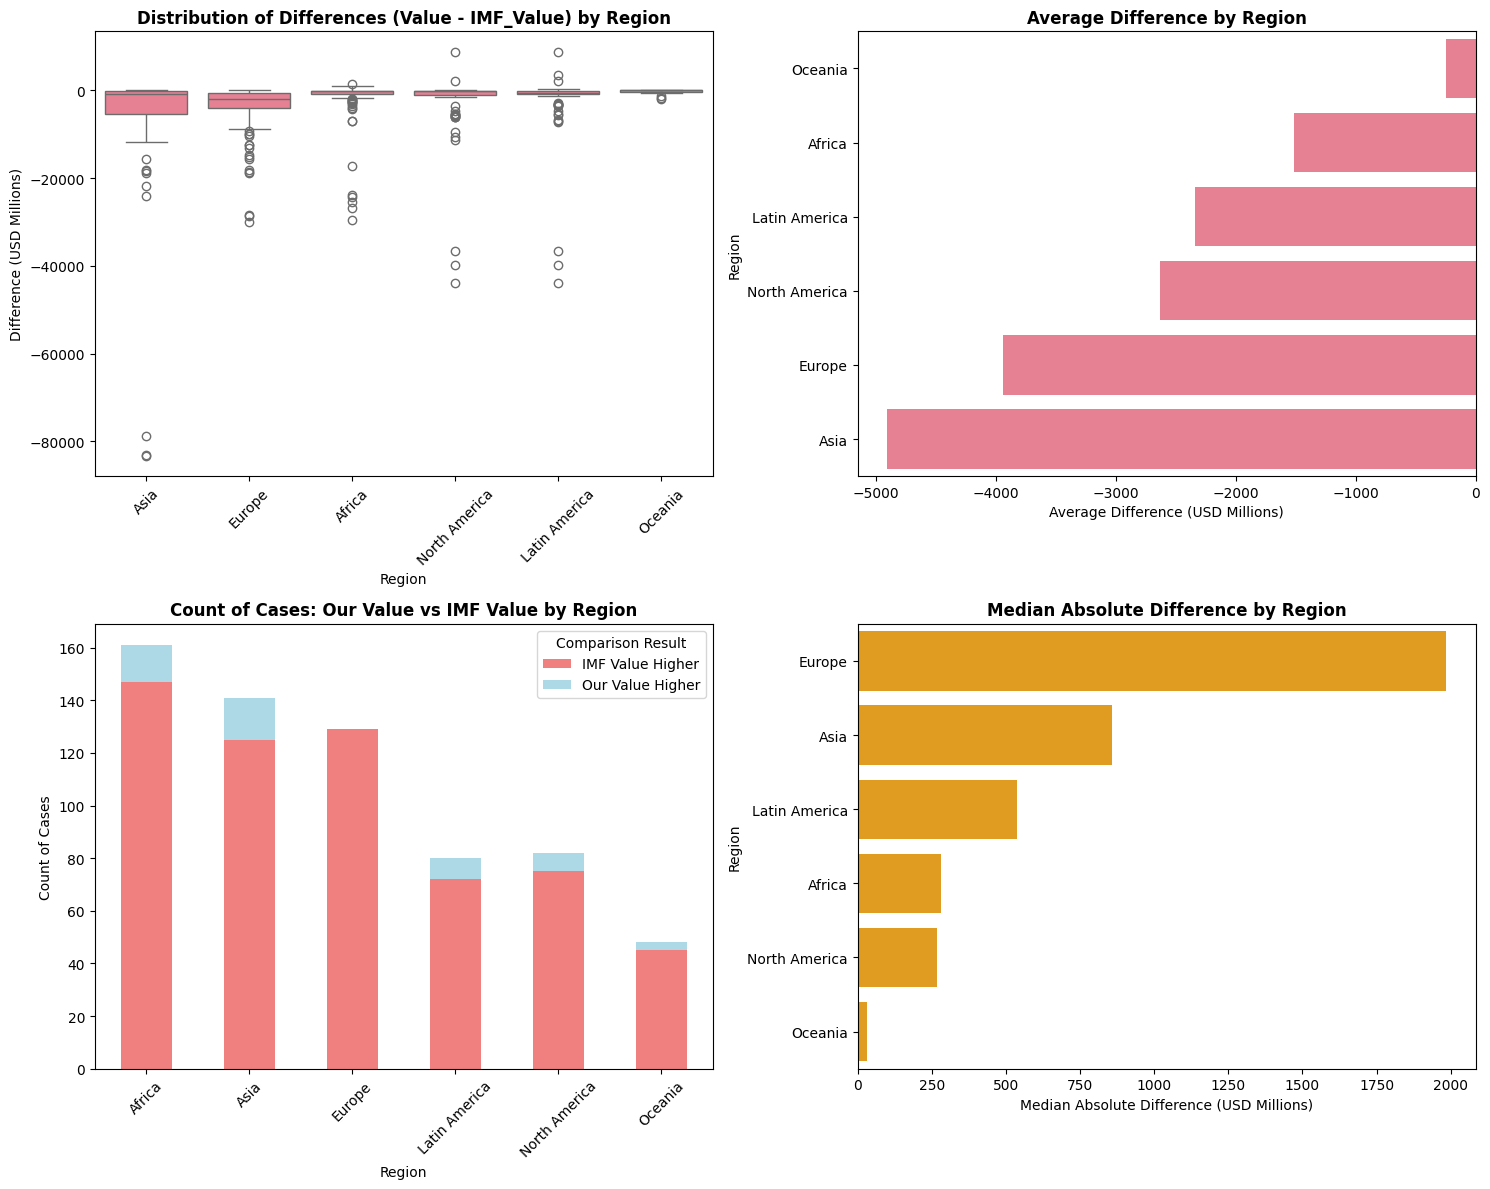


=== REGIONAL SUMMARY STATISTICS ===
              Difference                             Percent_Difference  \
                   count     mean   median       std               mean   
Region                                                                    
Africa               161 -1516.70  -260.70   4731.90                inf   
Asia                 141 -4903.99  -858.84  12294.71                inf   
Europe               129 -3935.73 -1984.69   5678.34             -98.67   
Latin America         80 -2340.70  -523.61   7816.25                inf   
North America         82 -2630.55  -141.36   7875.44                inf   
Oceania               48  -248.77   -30.40    420.91             -92.46   

                       
               median  
Region                 
Africa        -100.00  
Asia           -99.99  
Europe         -99.99  
Latin America  -93.03  
North America -100.00  
Oceania       -100.00  


In [46]:
# 1. VISUALIZATION BY REGION
print("=== 1. DIFFERENCES BY REGION ===")

# Create figure with subplots
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))

# 1a. Box plot of differences by region
sns.boxplot(data=viz_data, x='Region', y='Difference', ax=ax1)
ax1.set_title('Distribution of Differences (Value - IMF_Value) by Region', fontsize=12, fontweight='bold')
ax1.set_xlabel('Region')
ax1.set_ylabel('Difference (USD Millions)')
ax1.tick_params(axis='x', rotation=45)

# 1b. Average difference by region
region_avg_diff = viz_data.groupby('Region')['Difference'].mean().sort_values(ascending=False)
sns.barplot(x=region_avg_diff.values, y=region_avg_diff.index, ax=ax2)
ax2.set_title('Average Difference by Region', fontsize=12, fontweight='bold')
ax2.set_xlabel('Average Difference (USD Millions)')
ax2.set_ylabel('Region')

# 1c. Count of positive vs negative differences by region
viz_data['Diff_Sign'] = np.where(viz_data['Difference'] > 0, 'Our Value Higher', 'IMF Value Higher')
diff_counts = viz_data.groupby(['Region', 'Diff_Sign']).size().unstack(fill_value=0)
diff_counts.plot(kind='bar', stacked=True, ax=ax3, color=['lightcoral', 'lightblue'])
ax3.set_title('Count of Cases: Our Value vs IMF Value by Region', fontsize=12, fontweight='bold')
ax3.set_xlabel('Region')
ax3.set_ylabel('Count of Cases')
ax3.tick_params(axis='x', rotation=45)
ax3.legend(title='Comparison Result')

# 1d. Median absolute difference by region
region_abs_diff = viz_data.groupby('Region')['Difference'].apply(lambda x: np.median(np.abs(x))).sort_values(ascending=False)
sns.barplot(x=region_abs_diff.values, y=region_abs_diff.index, ax=ax4, color='orange')
ax4.set_title('Median Absolute Difference by Region', fontsize=12, fontweight='bold')
ax4.set_xlabel('Median Absolute Difference (USD Millions)')
ax4.set_ylabel('Region')

plt.tight_layout()
plt.show()

# Print summary statistics by region
print("\n=== REGIONAL SUMMARY STATISTICS ===")
regional_stats = viz_data.groupby('Region').agg({
    'Difference': ['count', 'mean', 'median', 'std'],
    'Percent_Difference': ['mean', 'median']
}).round(2)
print(regional_stats)

# HOW ARE THE DIFFERENCES CALCULATED?

This section clarifies **exactly** how the differences are calculated in our analysis:

In [134]:
# CLARIFICATION: HOW DIFFERENCES ARE CALCULATED
print("="*80)
print("DETAILED EXPLANATION: HOW DIFFERENCES ARE CALCULATED")
print("="*80)

# Let's examine the viz_data structure first
print("\n=== 1. DATA STRUCTURE ===")
print(f"viz_data shape: {viz_data.shape}")
print(f"Each row represents: ONE country in ONE specific year")
print(f"Key columns for difference calculation:")
print(f"- 'Value': Our remittance data (USD millions)")
print(f"- 'IMF_Value_Millions': IMF/WB reference data (USD millions)")
print(f"- 'Difference': Value - IMF_Value_Millions")
print(f"- 'Absolute_Difference': |Value - IMF_Value_Millions|")

# Show sample records to illustrate
print("\n=== 2. EXAMPLE: INDIVIDUAL YEAR-BY-YEAR DIFFERENCES ===")
sample_countries = ['Nigeria', 'Kenya', 'Colombia']
for country in sample_countries:
    if country in viz_data['Receiving_Country'].values:
        country_data = viz_data[viz_data['Receiving_Country'] == country].sort_values('Year')
        print(f"\n{country.upper()} - Individual Year Calculations:")
        print(f"{'Year':<6} {'Our Value':<12} {'IMF Value':<12} {'Difference':<12} {'Abs Diff':<12}")
        print("-" * 65)
        
        for _, row in country_data.iterrows():
            year = int(row['Year'])
            our_val = row['Value']
            imf_val = row['IMF_Value_Millions']
            diff = row['Difference']
            abs_diff = row['Absolute_Difference']
            
            print(f"{year:<6} {our_val:<12.2f} {imf_val:<12.2f} {diff:<12.2f} {abs_diff:<12.2f}")
            print(f"       Calculation: {our_val:.2f} - {imf_val:.2f} = {diff:.2f}")
            print(f"       Absolute: |{diff:.2f}| = {abs_diff:.2f}")
            print()

print("="*80)
print("STEP-BY-STEP CALCULATION PROCESS")
print("="*80)

print("\n📋 STEP 1: Individual Record Calculation")
print("   For each country-year combination:")
print("   • Raw Difference = Our_Value - IMF_Value")
print("   • Absolute Difference = |Our_Value - IMF_Value|")
print("   • This happens for EVERY row independently")

print("\n📊 STEP 2: Aggregation Methods")
print("   When we create summaries, we aggregate these individual differences:")
print()
print("   A) BY COUNTRY (averaging across years):")
print("      Country_Average = mean(all years for that country)")
print("      Example: Nigeria avg = mean(2018_diff, 2019_diff, 2020_diff)")
print()
print("   B) BY REGION (averaging across all country-years in region):")
print("      Region_Average = mean(all country-year records in region)")
print("      Example: Africa avg = mean(Nigeria_2018, Nigeria_2019, Kenya_2018, ...)")
print()
print("   C) BY YEAR (averaging across all countries in that year):")
print("      Year_Average = mean(all countries for that year)")
print("      Example: 2018 avg = mean(Nigeria_2018, Kenya_2018, Colombia_2018, ...)")

print("\n🔍 STEP 3: What This Means")
print("   • YES, differences are calculated PER YEAR for each country")
print("   • Each country-year is an independent observation")
print("   • When we show 'country averages', we're averaging that country's yearly differences")
print("   • When we show 'regional averages', we're averaging ALL country-year combinations in that region")

# Demonstrate with actual calculations
print("\n" + "="*80)
print("CONCRETE EXAMPLE: NIGERIA'S CALCULATION")
print("="*80)

nigeria_data = viz_data[viz_data['Receiving_Country'] == 'Nigeria']
if len(nigeria_data) > 0:
    print("\nNigeria's yearly differences:")
    total_abs_diff = 0
    for _, row in nigeria_data.iterrows():
        year = int(row['Year'])
        abs_diff = row['Absolute_Difference']
        total_abs_diff += abs_diff
        print(f"   {year}: {abs_diff:.2f} USD millions absolute difference")
    
    avg_abs_diff = total_abs_diff / len(nigeria_data)
    print(f"\nNigeria's average absolute difference:")
    print(f"   ({total_abs_diff:.2f}) / {len(nigeria_data)} years = {avg_abs_diff:.2f} USD millions")
    print(f"   This matches: {nigeria_data['Absolute_Difference'].mean():.2f}")

print("\n" + "="*80)
print("KEY TAKEAWAYS")
print("="*80)
print("✅ YES - Differences ARE calculated per year")
print("✅ Each country-year combination gets its own difference calculation")
print("✅ Country 'averages' = average of that country's yearly differences")
print("✅ Regional 'averages' = average of ALL country-year differences in that region")
print("✅ Time trends are preserved - you can see year-by-year changes")
print("❌ We do NOT aggregate first then calculate differences")
print("❌ We do NOT ignore the time dimension")

DETAILED EXPLANATION: HOW DIFFERENCES ARE CALCULATED

=== 1. DATA STRUCTURE ===
viz_data shape: (641, 10)
Each row represents: ONE country in ONE specific year
Key columns for difference calculation:
- 'Value': Our remittance data (USD millions)
- 'IMF_Value_Millions': IMF/WB reference data (USD millions)
- 'Difference': Value - IMF_Value_Millions
- 'Absolute_Difference': |Value - IMF_Value_Millions|

=== 2. EXAMPLE: INDIVIDUAL YEAR-BY-YEAR DIFFERENCES ===

NIGERIA - Individual Year Calculations:
Year   Our Value    IMF Value    Difference   Abs Diff    
-----------------------------------------------------------------
2018   1.82         24311.02     -24309.20    24309.20    
       Calculation: 1.82 - 24311.02 = -24309.20
       Absolute: |-24309.20| = 24309.20

2019   1.97         23809.28     -23807.31    23807.31    
       Calculation: 1.97 - 23809.28 = -23807.31
       Absolute: |-23807.31| = 23807.31

2020   1.29         17207.55     -17206.26    17206.26    
       Calculation

VISUAL DEMONSTRATION: YEAR-BY-YEAR DIFFERENCE CALCULATIONS
Creating visualization 1: Raw values by country and year...


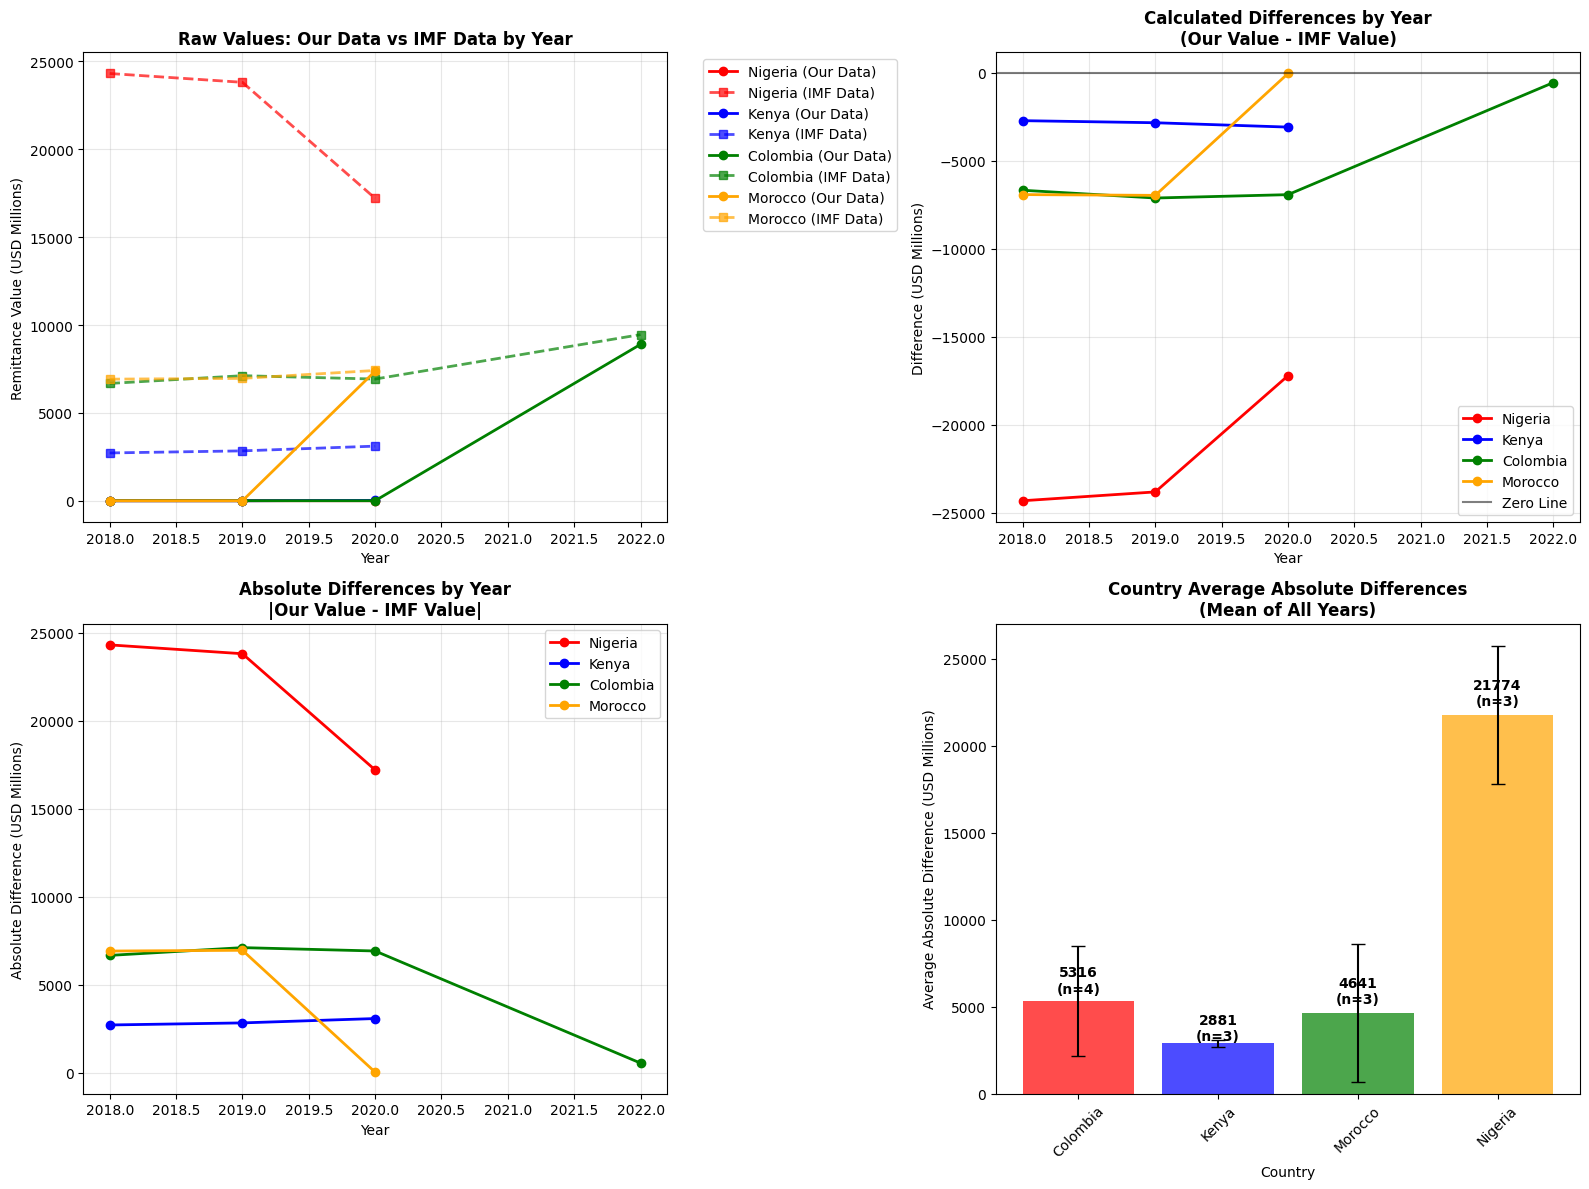


SUMMARY TABLE: STEP-BY-STEP CALCULATION PROCESS

Country      Year   Our Value    IMF Value    Raw Diff     Abs Diff     Method              
------------------------------------------------------------------------------------------
Nigeria      2018   1.82         24311.02     -24309.20    24309.20     Per-year calculation
Nigeria      2019   1.97         23809.28     -23807.31    23807.31     Per-year calculation
Nigeria      2020   1.29         17207.55     -17206.26    17206.26     Per-year calculation
             AVG                                           21774.26     Mean of years above 
------------------------------------------------------------------------------------------
Kenya        2018   0.07         2720.37      -2720.30     2720.30      Per-year calculation
Kenya        2019   0.04         2838.19      -2838.16     2838.16      Per-year calculation
Kenya        2020   22.30        3107.93      -3085.64     3085.64      Per-year calculation
             AVG        

In [135]:
# VISUAL DEMONSTRATION: DIFFERENCE CALCULATION METHODOLOGY
print("="*80)
print("VISUAL DEMONSTRATION: YEAR-BY-YEAR DIFFERENCE CALCULATIONS")
print("="*80)

# Create a comprehensive visualization showing the calculation process
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))

# Select a few countries for clear demonstration
demo_countries = ['Nigeria', 'Kenya', 'Colombia', 'Morocco']
demo_data = viz_data[viz_data['Receiving_Country'].isin(demo_countries)].copy()

# 1. Show raw values year by year
print("Creating visualization 1: Raw values by country and year...")
colors = ['red', 'blue', 'green', 'orange']
for i, country in enumerate(demo_countries):
    country_data = demo_data[demo_data['Receiving_Country'] == country].sort_values('Year')
    if len(country_data) > 0:
        ax1.plot(country_data['Year'], country_data['Value'], 
                marker='o', linewidth=2, label=f'{country} (Our Data)', 
                color=colors[i], linestyle='-')
        ax1.plot(country_data['Year'], country_data['IMF_Value_Millions'], 
                marker='s', linewidth=2, label=f'{country} (IMF Data)', 
                color=colors[i], linestyle='--', alpha=0.7)

ax1.set_title('Raw Values: Our Data vs IMF Data by Year', fontsize=12, fontweight='bold')
ax1.set_xlabel('Year')
ax1.set_ylabel('Remittance Value (USD Millions)')
ax1.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
ax1.grid(True, alpha=0.3)

# 2. Show the differences (year by year)
for i, country in enumerate(demo_countries):
    country_data = demo_data[demo_data['Receiving_Country'] == country].sort_values('Year')
    if len(country_data) > 0:
        ax2.plot(country_data['Year'], country_data['Difference'], 
                marker='o', linewidth=2, label=country, color=colors[i])

ax2.set_title('Calculated Differences by Year\n(Our Value - IMF Value)', fontsize=12, fontweight='bold')
ax2.set_xlabel('Year')
ax2.set_ylabel('Difference (USD Millions)')
ax2.axhline(y=0, color='black', linestyle='-', alpha=0.5, label='Zero Line')
ax2.legend()
ax2.grid(True, alpha=0.3)

# 3. Show absolute differences (what we use for analysis)
for i, country in enumerate(demo_countries):
    country_data = demo_data[demo_data['Receiving_Country'] == country].sort_values('Year')
    if len(country_data) > 0:
        ax3.plot(country_data['Year'], country_data['Absolute_Difference'], 
                marker='o', linewidth=2, label=country, color=colors[i])

ax3.set_title('Absolute Differences by Year\n|Our Value - IMF Value|', fontsize=12, fontweight='bold')
ax3.set_xlabel('Year')
ax3.set_ylabel('Absolute Difference (USD Millions)')
ax3.legend()
ax3.grid(True, alpha=0.3)

# 4. Show how country averages are calculated
country_avgs = demo_data.groupby('Receiving_Country')['Absolute_Difference'].agg(['mean', 'std']).reset_index()
bars = ax4.bar(range(len(country_avgs)), country_avgs['mean'], 
               yerr=country_avgs['std'], capsize=5, alpha=0.7, color=colors[:len(country_avgs)])
ax4.set_title('Country Average Absolute Differences\n(Mean of All Years)', fontsize=12, fontweight='bold')
ax4.set_xlabel('Country')
ax4.set_ylabel('Average Absolute Difference (USD Millions)')
ax4.set_xticks(range(len(country_avgs)))
ax4.set_xticklabels(country_avgs['Receiving_Country'], rotation=45)

# Add value labels on bars
for i, bar in enumerate(bars):
    height = bar.get_height()
    n_years = len(demo_data[demo_data['Receiving_Country'] == country_avgs.iloc[i]['Receiving_Country']])
    ax4.text(bar.get_x() + bar.get_width()/2., height + country_avgs.iloc[i]['std'] * 0.1,
             f'{height:.0f}\n(n={n_years})', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

# Create a summary table showing the step-by-step process
print("\n" + "="*90)
print("SUMMARY TABLE: STEP-BY-STEP CALCULATION PROCESS")
print("="*90)

print(f"\n{'Country':<12} {'Year':<6} {'Our Value':<12} {'IMF Value':<12} {'Raw Diff':<12} {'Abs Diff':<12} {'Method':<20}")
print("-" * 90)

# Show detailed calculations for 2-3 countries
for country in ['Nigeria', 'Kenya'][:2]:  # Limit to 2 countries to keep output manageable
    if country in demo_data['Receiving_Country'].values:
        country_data = demo_data[demo_data['Receiving_Country'] == country].sort_values('Year')
        for _, row in country_data.iterrows():
            year = int(row['Year'])
            our_val = row['Value']
            imf_val = row['IMF_Value_Millions']
            raw_diff = row['Difference']
            abs_diff = row['Absolute_Difference']
            
            print(f"{country:<12} {year:<6} {our_val:<12.2f} {imf_val:<12.2f} {raw_diff:<12.2f} {abs_diff:<12.2f} {'Per-year calculation':<20}")
        
        # Show average calculation
        avg_abs = country_data['Absolute_Difference'].mean()
        print(f"{'':<12} {'AVG':<6} {'':<12} {'':<12} {'':<12} {avg_abs:<12.2f} {'Mean of years above':<20}")
        print("-" * 90)

print(f"\n🎯 KEY INSIGHT: Each country-year gets its own difference calculation!")
print(f"📊 Country averages = mean of that country's yearly absolute differences")
print(f"🌍 Regional averages = mean of ALL country-year absolute differences in region")
print(f"📈 This preserves temporal variation while allowing meaningful comparisons")

In [136]:
viz_data

,Receiving_Country,Year,Value,IMF_Value_Millions,Region,Receiving_Country_Code,Difference,Percent_Difference,Diff_Sign,Absolute_Difference
0,Afghanistan,2018,0.048635,803.546454,Asia,AFG,-803.497819,-99.993947,IMF Value Higher,803.497819
1,Afghanistan,2019,0.032250,828.571904,Asia,AFG,-828.539654,-99.996108,IMF Value Higher,828.539654
2,Afghanistan,2020,0.040370,788.917115,Asia,AFG,-788.876745,-99.994883,IMF Value Higher,788.876745
3,Albania,2018,0.033066,1458.210056,Europe,ALB,-1458.176990,-99.997732,IMF Value Higher,1458.176990
4,Albania,2019,0.047893,1472.812242,Europe,ALB,-1472.764349,-99.996748,IMF Value Higher,1472.764349
...,...,...,...,...,...,...,...,...,...,...
685,Zambia,2019,0.001165,98.259121,Africa,ZMB,-98.257956,-99.998814,IMF Value Higher,98.257956
686,Zambia,2020,0.000978,134.864832,Africa,ZMB,-134.863854,-99.999275,IMF Value Higher,134.863854
687,Zimbabwe,2018,0.008487,1427.703019,Africa,ZWE,-1427.694532,-99.999406,IMF Value Higher,1427.694532
688,Zimbabwe,2019,0.000353,1417.011953,Africa,ZWE,-1417.011600,-99.999975,IMF Value Higher,1417.011600


=== 2. DIFFERENCES BY REGION AND TIME ===


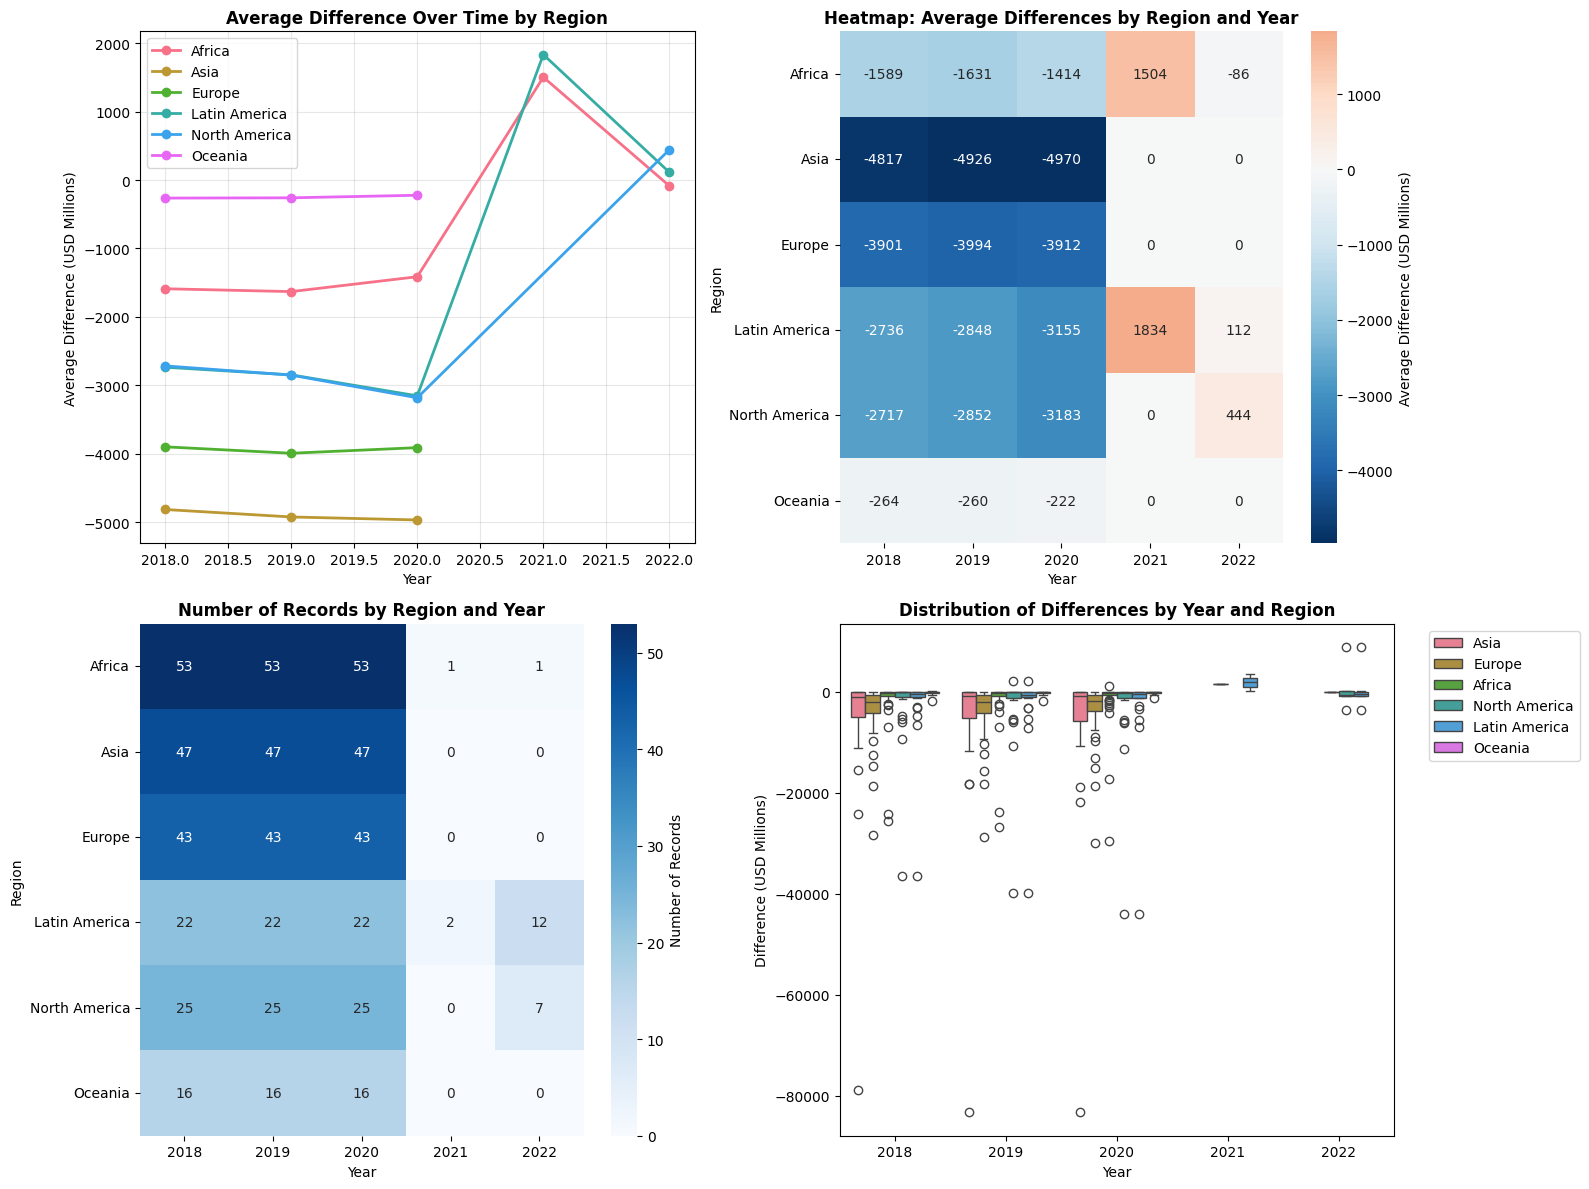


=== REGION-YEAR AVERAGE DIFFERENCES ===
Year              2018     2019     2020     2021    2022
Region                                                   
Africa        -1589.36 -1631.15 -1413.56  1503.71  -86.08
Asia          -4816.62 -4925.78 -4969.56     0.00    0.00
Europe        -3900.52 -3994.20 -3912.47     0.00    0.00
Latin America -2736.45 -2848.18 -3154.86  1833.88  112.09
North America -2717.15 -2852.15 -3183.18     0.00  443.84
Oceania        -263.86  -260.07  -222.38     0.00    0.00


In [47]:
# 2. VISUALIZATION BY REGION AND TIME
print("=== 2. DIFFERENCES BY REGION AND TIME ===")

# Create figure with subplots
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))

# 2a. Line plot showing average difference over time by region
region_time_avg = viz_data.groupby(['Region', 'Year'])['Difference'].mean().reset_index()
for region in region_time_avg['Region'].unique():
    region_data = region_time_avg[region_time_avg['Region'] == region]
    ax1.plot(region_data['Year'], region_data['Difference'], marker='o', linewidth=2, label=region)

ax1.set_title('Average Difference Over Time by Region', fontsize=12, fontweight='bold')
ax1.set_xlabel('Year')
ax1.set_ylabel('Average Difference (USD Millions)')
ax1.legend()
ax1.grid(True, alpha=0.3)

# 2b. Heatmap of differences by region and year
region_year_pivot = viz_data.groupby(['Region', 'Year'])['Difference'].mean().unstack(fill_value=0)
sns.heatmap(region_year_pivot, annot=True, fmt='.0f', cmap='RdBu_r', center=0, ax=ax2, cbar_kws={'label': 'Average Difference (USD Millions)'})
ax2.set_title('Heatmap: Average Differences by Region and Year', fontsize=12, fontweight='bold')
ax2.set_xlabel('Year')
ax2.set_ylabel('Region')

# 2c. Count of records by region and year
region_year_counts = viz_data.groupby(['Region', 'Year']).size().unstack(fill_value=0)
sns.heatmap(region_year_counts, annot=True, fmt='d', cmap='Blues', ax=ax3, cbar_kws={'label': 'Number of Records'})
ax3.set_title('Number of Records by Region and Year', fontsize=12, fontweight='bold')
ax3.set_xlabel('Year')
ax3.set_ylabel('Region')

# 2d. Box plot of differences by year, colored by region
sns.boxplot(data=viz_data, x='Year', y='Difference', hue='Region', ax=ax4)
ax4.set_title('Distribution of Differences by Year and Region', fontsize=12, fontweight='bold')
ax4.set_xlabel('Year')
ax4.set_ylabel('Difference (USD Millions)')
ax4.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

# Print summary by region and year
print("\n=== REGION-YEAR AVERAGE DIFFERENCES ===")
print(region_year_pivot.round(2))

=== 3. DIFFERENCES BY COUNTRY ===


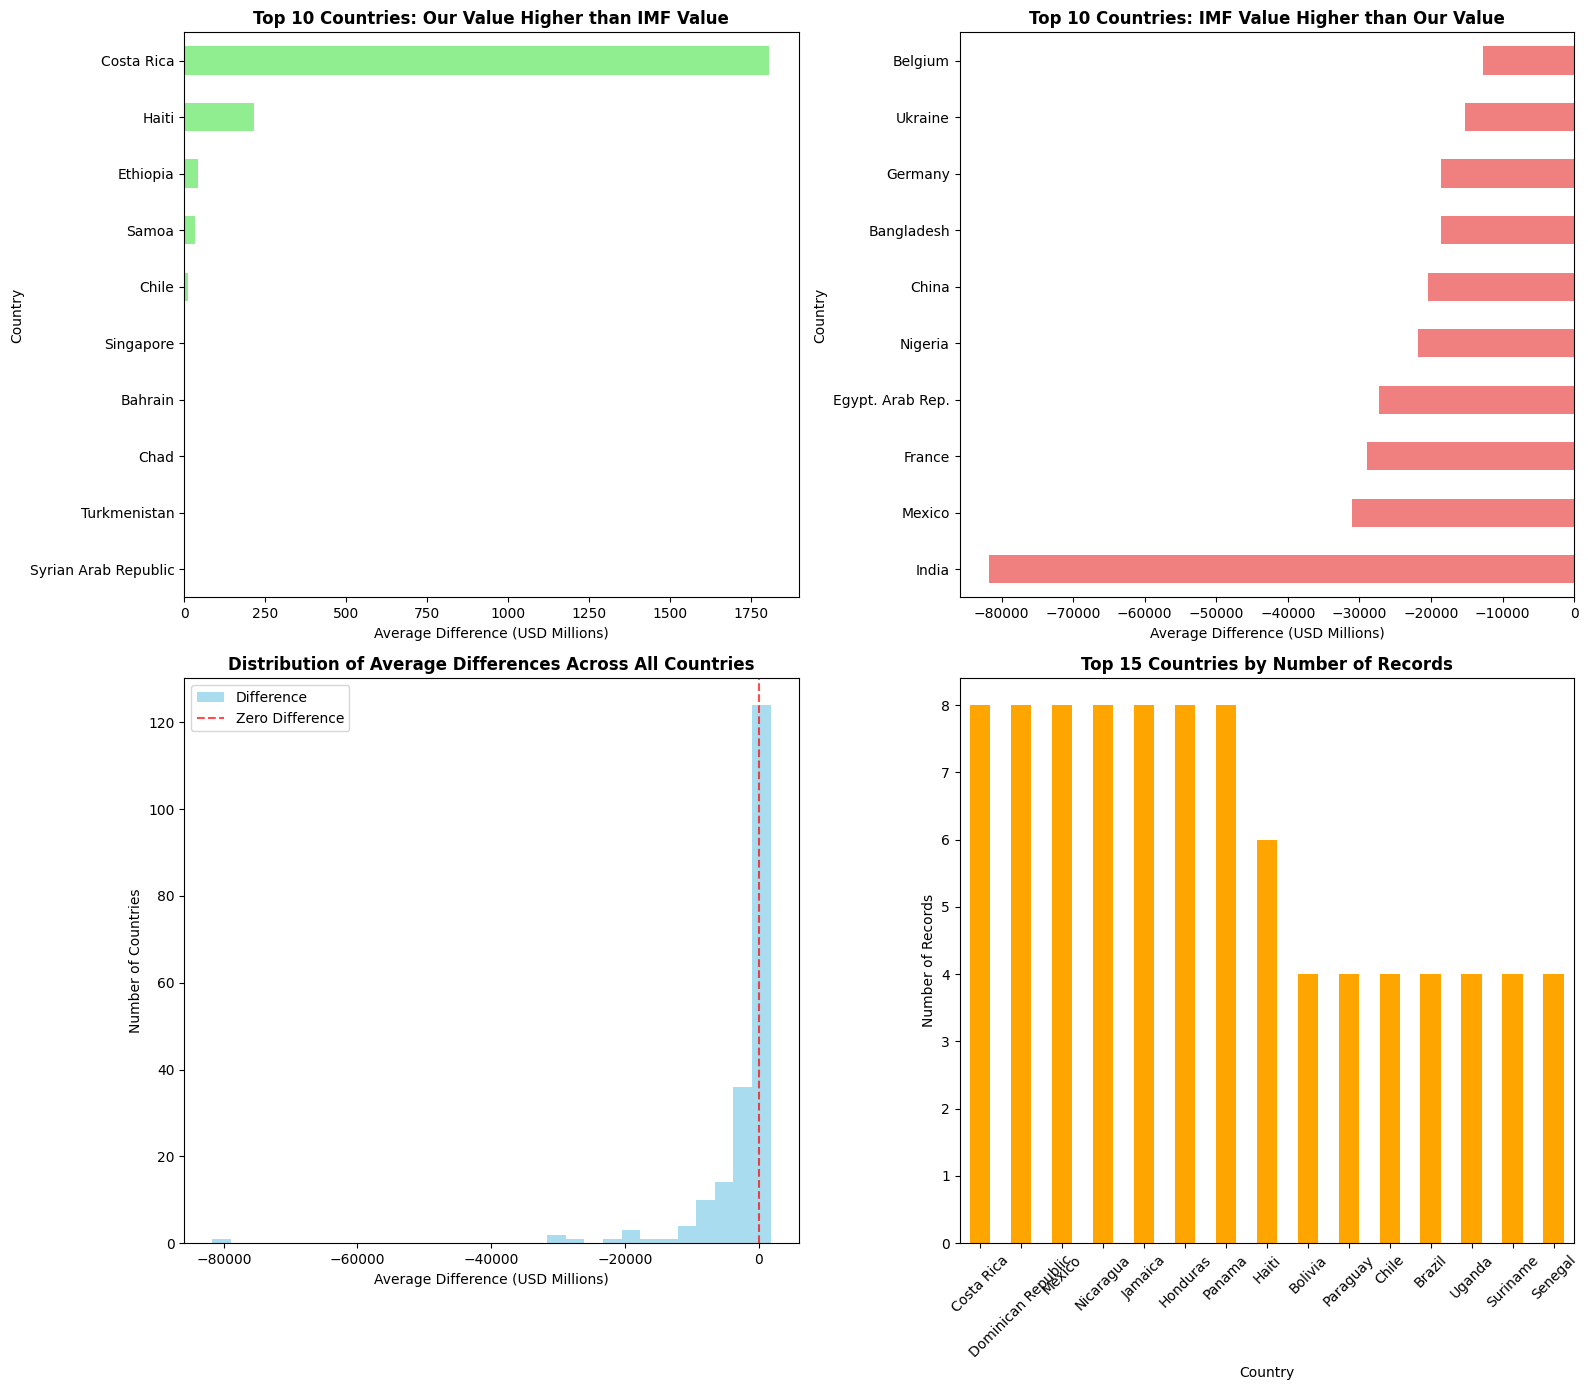


=== COUNTRY SUMMARY STATISTICS ===
Total countries with data: 198
Countries where our value is higher: 16
Countries where IMF value is higher: 182
Average difference across all countries: -2815.81 USD millions

=== TOP 5 LARGEST POSITIVE DIFFERENCES ===
Chile: +10.85 USD millions
Samoa: +32.04 USD millions
Ethiopia: +42.62 USD millions
Haiti: +214.30 USD millions
Costa Rica: +1806.86 USD millions

=== TOP 5 LARGEST NEGATIVE DIFFERENCES ===
India: -81756.53 USD millions
Mexico: -30986.32 USD millions
France: -29001.18 USD millions
Egypt. Arab Rep.: -27299.59 USD millions
Nigeria: -21774.26 USD millions


In [48]:
# 3. VISUALIZATION BY COUNTRY
print("=== 3. DIFFERENCES BY COUNTRY ===")

# Calculate average differences by country and get top 20 for visualization
country_avg_diff = viz_data.groupby('Receiving_Country')['Difference'].mean().sort_values()

# Get top 10 countries with largest positive differences (our value higher)
top_positive = country_avg_diff.tail(10)

# Get top 10 countries with largest negative differences (IMF value higher)  
top_negative = country_avg_diff.head(10)

# Create figure with subplots
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 14))

# 3a. Top 10 countries where our value is higher than IMF
top_positive.plot(kind='barh', ax=ax1, color='lightgreen')
ax1.set_title('Top 10 Countries: Our Value Higher than IMF Value', fontsize=12, fontweight='bold')
ax1.set_xlabel('Average Difference (USD Millions)')
ax1.set_ylabel('Country')

# 3b. Top 10 countries where IMF value is higher than ours
top_negative.plot(kind='barh', ax=ax2, color='lightcoral')
ax2.set_title('Top 10 Countries: IMF Value Higher than Our Value', fontsize=12, fontweight='bold')
ax2.set_xlabel('Average Difference (USD Millions)')
ax2.set_ylabel('Country')

# 3c. Distribution of differences across all countries
country_avg_diff.plot(kind='hist', bins=30, ax=ax3, color='skyblue', alpha=0.7)
ax3.set_title('Distribution of Average Differences Across All Countries', fontsize=12, fontweight='bold')
ax3.set_xlabel('Average Difference (USD Millions)')
ax3.set_ylabel('Number of Countries')
ax3.axvline(x=0, color='red', linestyle='--', alpha=0.7, label='Zero Difference')
ax3.legend()

# 3d. Countries with most records (data availability)
country_counts = viz_data['Receiving_Country'].value_counts().head(15)
country_counts.plot(kind='bar', ax=ax4, color='orange')
ax4.set_title('Top 15 Countries by Number of Records', fontsize=12, fontweight='bold')
ax4.set_xlabel('Country')
ax4.set_ylabel('Number of Records')
ax4.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

print(f"\n=== COUNTRY SUMMARY STATISTICS ===")
print(f"Total countries with data: {len(country_avg_diff)}")
print(f"Countries where our value is higher: {(country_avg_diff > 0).sum()}")
print(f"Countries where IMF value is higher: {(country_avg_diff < 0).sum()}")
print(f"Average difference across all countries: {country_avg_diff.mean():.2f} USD millions")

print("\n=== TOP 5 LARGEST POSITIVE DIFFERENCES ===")
for country, diff in top_positive.tail(5).items():
    print(f"{country}: +{diff:.2f} USD millions")

print("\n=== TOP 5 LARGEST NEGATIVE DIFFERENCES ===") 
for country, diff in top_negative.head(5).items():
    print(f"{country}: {diff:.2f} USD millions")

=== 4. DIFFERENCES BY COUNTRY AND TIME ===


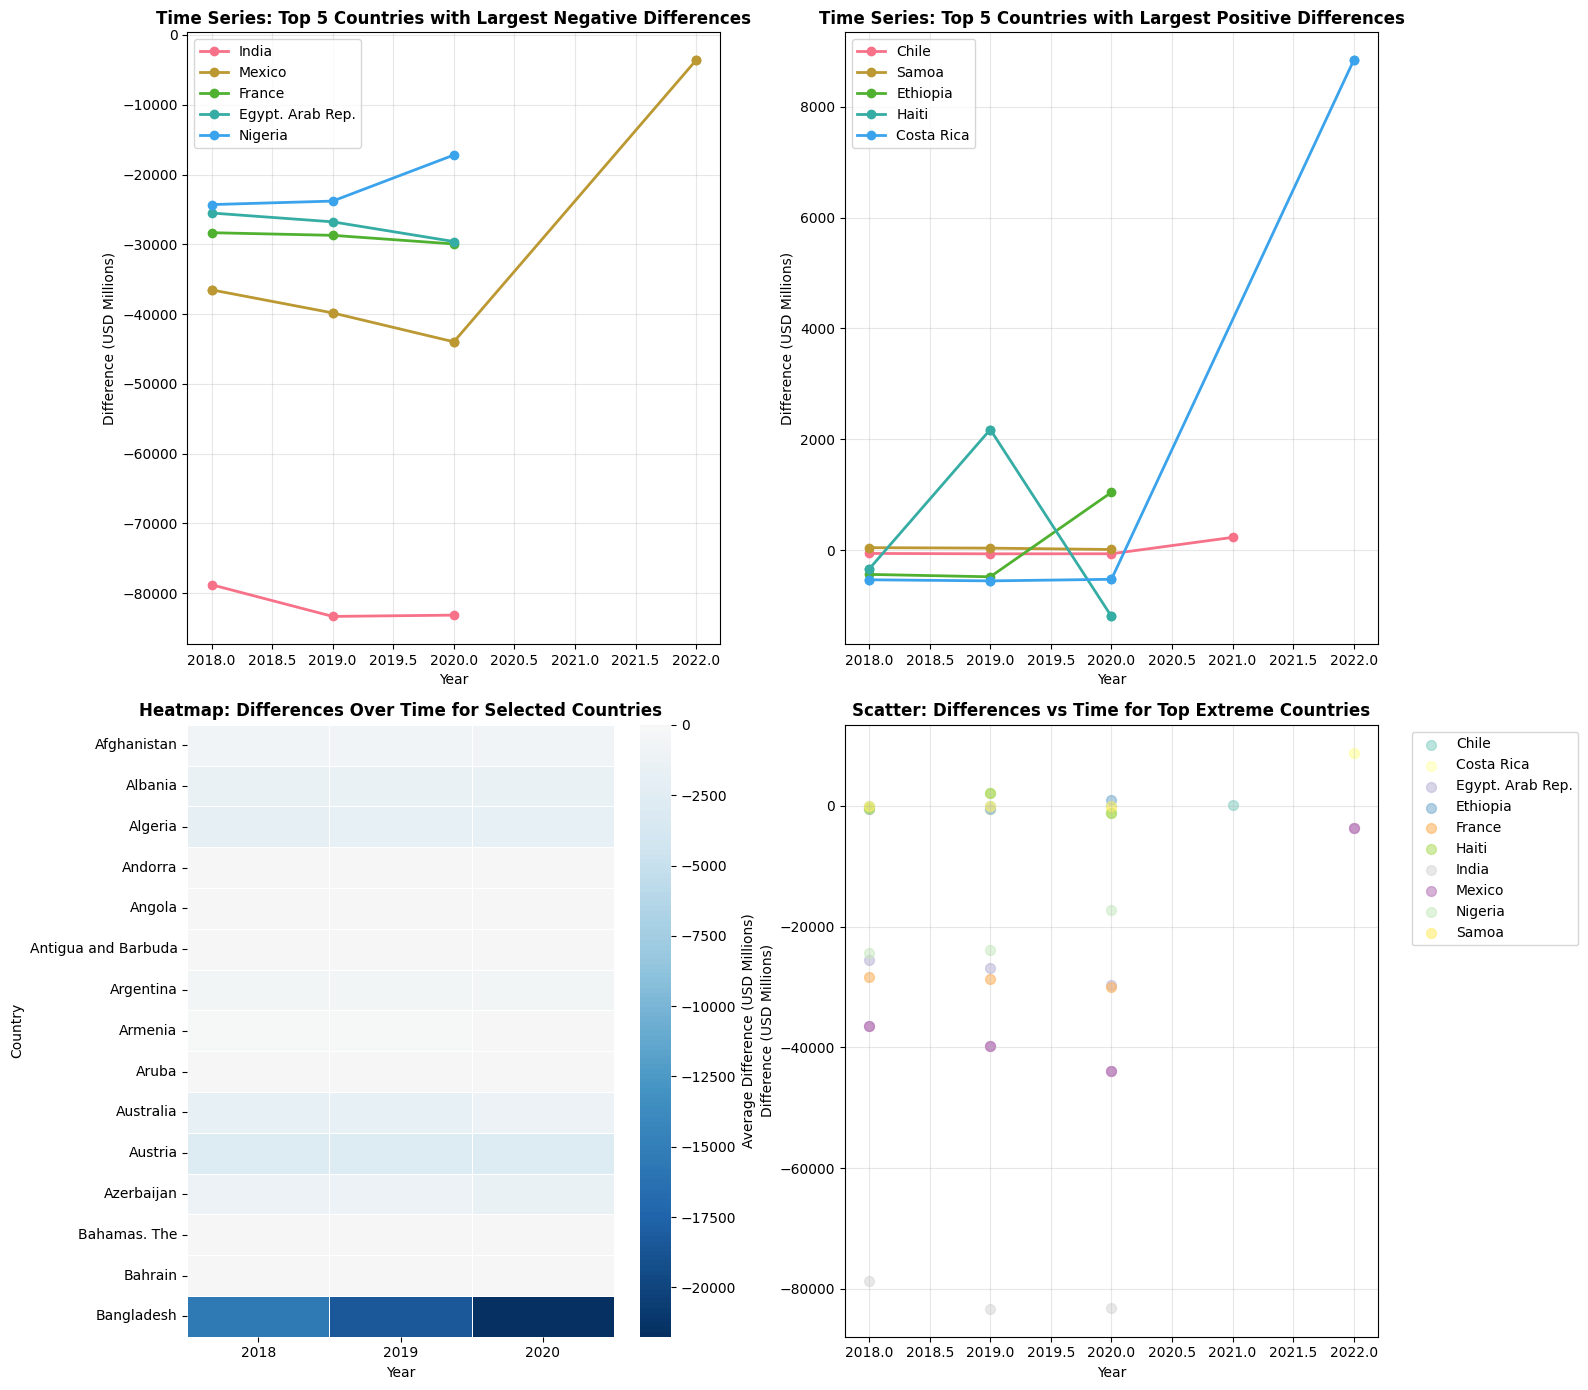


=== TIME SERIES STATISTICS FOR EXTREME COUNTRIES ===

India:
  Years with data: [np.int64(2018), np.int64(2019), np.int64(2020)]
  Avg difference: -81756.53 USD millions
  Difference range: -83331.38 to -78789.44

Mexico:
  Years with data: [np.int64(2018), np.int64(2019), np.int64(2020), np.int64(2022)]
  Avg difference: -30986.32 USD millions
  Difference range: -43977.64 to -3607.91

France:
  Years with data: [np.int64(2018), np.int64(2019), np.int64(2020)]
  Avg difference: -29001.18 USD millions
  Difference range: -29950.70 to -28337.30

Egypt. Arab Rep.:
  Years with data: [np.int64(2018), np.int64(2019), np.int64(2020)]
  Avg difference: -27299.59 USD millions
  Difference range: -29602.57 to -25515.26

Nigeria:
  Years with data: [np.int64(2018), np.int64(2019), np.int64(2020)]
  Avg difference: -21774.26 USD millions
  Difference range: -24309.20 to -17206.26

Chile:
  Years with data: [np.int64(2018), np.int64(2019), np.int64(2020), np.int64(2021)]
  Avg difference: 10.85 

In [49]:
# 4. VISUALIZATION BY COUNTRY AND TIME
print("=== 4. DIFFERENCES BY COUNTRY AND TIME ===")

# Select top 10 countries with most extreme differences for time series analysis
top_extreme_countries = list(country_avg_diff.head(5).index) + list(country_avg_diff.tail(5).index)

# Filter data for these countries
country_time_data = viz_data[viz_data['Receiving_Country'].isin(top_extreme_countries)]

# Create figure with subplots
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 14))

# 4a. Line plot for top 5 countries with largest negative differences
for country in country_avg_diff.head(5).index:
    country_data = country_time_data[country_time_data['Receiving_Country'] == country]
    if len(country_data) > 0:
        ax1.plot(country_data['Year'], country_data['Difference'], marker='o', linewidth=2, label=country)

ax1.set_title('Time Series: Top 5 Countries with Largest Negative Differences', fontsize=12, fontweight='bold')
ax1.set_xlabel('Year')
ax1.set_ylabel('Difference (USD Millions)')
ax1.legend()
ax1.grid(True, alpha=0.3)

# 4b. Line plot for top 5 countries with largest positive differences
for country in country_avg_diff.tail(5).index:
    country_data = country_time_data[country_time_data['Receiving_Country'] == country]
    if len(country_data) > 0:
        ax2.plot(country_data['Year'], country_data['Difference'], marker='o', linewidth=2, label=country)

ax2.set_title('Time Series: Top 5 Countries with Largest Positive Differences', fontsize=12, fontweight='bold')
ax2.set_xlabel('Year')
ax2.set_ylabel('Difference (USD Millions)')
ax2.legend()
ax2.grid(True, alpha=0.3)

# 4c. Heatmap for selected countries over time
# Select countries with data in multiple years
countries_multi_year = viz_data.groupby('Receiving_Country')['Year'].nunique()
countries_with_multi_year = countries_multi_year[countries_multi_year >= 3].index[:15]  # Top 15

heatmap_data = viz_data[viz_data['Receiving_Country'].isin(countries_with_multi_year)]
heatmap_pivot = heatmap_data.groupby(['Receiving_Country', 'Year'])['Difference'].mean().unstack(fill_value=np.nan)

sns.heatmap(heatmap_pivot, cmap='RdBu_r', center=0, ax=ax3, 
            cbar_kws={'label': 'Average Difference (USD Millions)'}, 
            linewidths=0.5, annot=False)
ax3.set_title('Heatmap: Differences Over Time for Selected Countries', fontsize=12, fontweight='bold')
ax3.set_xlabel('Year')
ax3.set_ylabel('Country')

# 4d. Scatter plot showing relationship between years and differences
colors = plt.cm.Set3(np.linspace(0, 1, len(country_time_data['Receiving_Country'].unique())))
for i, country in enumerate(country_time_data['Receiving_Country'].unique()):
    country_data = country_time_data[country_time_data['Receiving_Country'] == country]
    ax4.scatter(country_data['Year'], country_data['Difference'], 
               alpha=0.6, s=50, c=[colors[i]], label=country if i < 10 else "")

ax4.set_title('Scatter: Differences vs Time for Top Extreme Countries', fontsize=12, fontweight='bold')
ax4.set_xlabel('Year')
ax4.set_ylabel('Difference (USD Millions)')
ax4.grid(True, alpha=0.3)
if len(country_time_data['Receiving_Country'].unique()) <= 10:
    ax4.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

# Show some statistics for the extreme countries
print("\n=== TIME SERIES STATISTICS FOR EXTREME COUNTRIES ===")
for country in top_extreme_countries[:8]:  # Show first 8 to save space
    country_data = viz_data[viz_data['Receiving_Country'] == country]
    if len(country_data) > 1:
        print(f"\n{country}:")
        print(f"  Years with data: {sorted(country_data['Year'].unique())}")
        print(f"  Avg difference: {country_data['Difference'].mean():.2f} USD millions")
        print(f"  Difference range: {country_data['Difference'].min():.2f} to {country_data['Difference'].max():.2f}")
    else:
        print(f"\n{country}: Only 1 year of data")

=== 5. DIFFERENCES BY TIME ONLY ===


C:\Users\clint\AppData\Local\Temp\ipykernel_1624\3146829422.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=viz_data, x='Year', y='Difference', ax=ax2, palette='viridis')


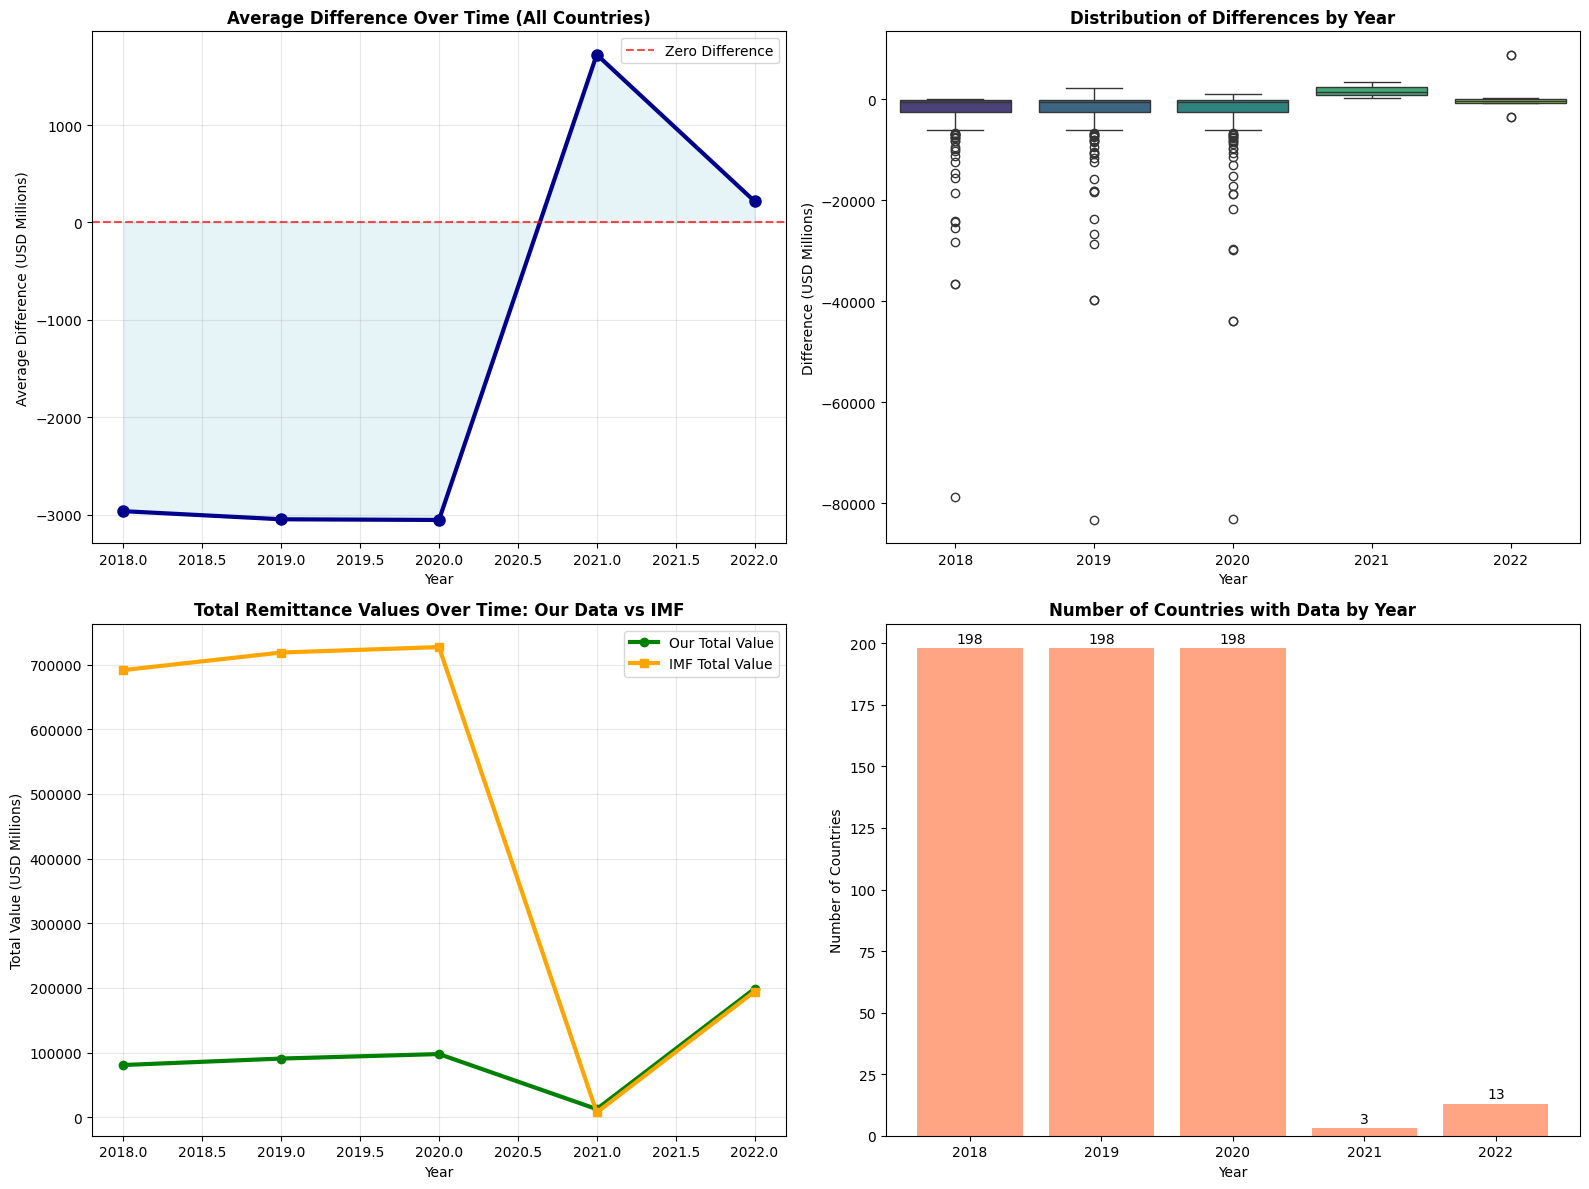


=== DETAILED YEARLY STATISTICS ===
Format: Year | Count | Mean Diff | Median Diff | Std Dev | Min Diff | Max Diff
--------------------------------------------------------------------------------
2018 |   206 |  -2964.52 |     -521.61 | 7704.66 | -78789.44 |    45.97
2019 |   206 |  -3047.76 |     -547.58 | 8085.10 | -83331.38 |  2176.97
2020 |   206 |  -3054.70 |     -513.86 | 8288.10 | -83148.77 |  1043.80
2021 |     3 |   1723.82 |     1503.71 | 1613.79 |   231.39 |  3436.37
2022 |    20 |    218.29 |     -401.78 | 3127.88 | -3607.91 |  8839.12

=== OVERALL TIME TRENDS ===
Years with data: [np.int64(2018), np.int64(2019), np.int64(2020), np.int64(2021), np.int64(2022)]
Total records across all years: 641
Average difference across all years: -2899.00 USD millions
Years where average difference was positive: 2
Years where average difference was negative: 3
Correlation between year and difference: 0.040 (p-value: 0.311)
Trend: No significant trend over time


In [50]:
# 5. VISUALIZATION BY TIME ONLY
print("=== 5. DIFFERENCES BY TIME ONLY ===")

# Calculate various statistics by year
yearly_stats = viz_data.groupby('Year').agg({
    'Difference': ['count', 'mean', 'median', 'std', 'min', 'max'],
    'Value': ['sum', 'mean'],
    'IMF_Value_Millions': ['sum', 'mean']
}).round(2)

# Create figure with subplots
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))

# 5a. Average difference over time
yearly_avg = viz_data.groupby('Year')['Difference'].mean()
ax1.plot(yearly_avg.index, yearly_avg.values, marker='o', linewidth=3, markersize=8, color='darkblue')
ax1.fill_between(yearly_avg.index, yearly_avg.values, alpha=0.3, color='lightblue')
ax1.set_title('Average Difference Over Time (All Countries)', fontsize=12, fontweight='bold')
ax1.set_xlabel('Year')
ax1.set_ylabel('Average Difference (USD Millions)')
ax1.grid(True, alpha=0.3)
ax1.axhline(y=0, color='red', linestyle='--', alpha=0.7, label='Zero Difference')
ax1.legend()

# 5b. Box plot of differences by year
sns.boxplot(data=viz_data, x='Year', y='Difference', ax=ax2, palette='viridis')
ax2.set_title('Distribution of Differences by Year', fontsize=12, fontweight='bold')
ax2.set_xlabel('Year')
ax2.set_ylabel('Difference (USD Millions)')

# 5c. Total values comparison over time
yearly_totals = viz_data.groupby('Year')[['Value', 'IMF_Value_Millions']].sum()
ax3.plot(yearly_totals.index, yearly_totals['Value'], marker='o', linewidth=3, label='Our Total Value', color='green')
ax3.plot(yearly_totals.index, yearly_totals['IMF_Value_Millions'], marker='s', linewidth=3, label='IMF Total Value', color='orange')
ax3.set_title('Total Remittance Values Over Time: Our Data vs IMF', fontsize=12, fontweight='bold')
ax3.set_xlabel('Year')
ax3.set_ylabel('Total Value (USD Millions)')
ax3.legend()
ax3.grid(True, alpha=0.3)

# 5d. Number of countries with data by year
yearly_counts = viz_data.groupby('Year')['Receiving_Country'].nunique()
bars = ax4.bar(yearly_counts.index, yearly_counts.values, color='coral', alpha=0.7)
ax4.set_title('Number of Countries with Data by Year', fontsize=12, fontweight='bold')
ax4.set_xlabel('Year')
ax4.set_ylabel('Number of Countries')

# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    ax4.text(bar.get_x() + bar.get_width()/2., height + 1,
             f'{int(height)}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Print detailed yearly statistics
print("\n=== DETAILED YEARLY STATISTICS ===")
print("Format: Year | Count | Mean Diff | Median Diff | Std Dev | Min Diff | Max Diff")
print("-" * 80)
for year in sorted(viz_data['Year'].unique()):
    year_data = viz_data[viz_data['Year'] == year]['Difference']
    print(f"{year} | {len(year_data):5d} | {year_data.mean():9.2f} | {year_data.median():11.2f} | "
          f"{year_data.std():7.2f} | {year_data.min():8.2f} | {year_data.max():8.2f}")

print(f"\n=== OVERALL TIME TRENDS ===")
print(f"Years with data: {sorted(viz_data['Year'].unique())}")
print(f"Total records across all years: {len(viz_data)}")
print(f"Average difference across all years: {viz_data['Difference'].mean():.2f} USD millions")
print(f"Years where average difference was positive: {(yearly_avg > 0).sum()}")
print(f"Years where average difference was negative: {(yearly_avg < 0).sum()}")

# Calculate correlation between year and difference
from scipy.stats import pearsonr
correlation, p_value = pearsonr(viz_data['Year'], viz_data['Difference'])
print(f"Correlation between year and difference: {correlation:.3f} (p-value: {p_value:.3f})")
if p_value < 0.05:
    trend = "improving" if correlation > 0 else "worsening"
    print(f"Trend: Differences are {trend} over time (statistically significant)")
else:
    print("Trend: No significant trend over time")

=== ABSOLUTE DIFFERENCES ANALYSIS ===
Absolute difference range: 0.00 to 83331.38


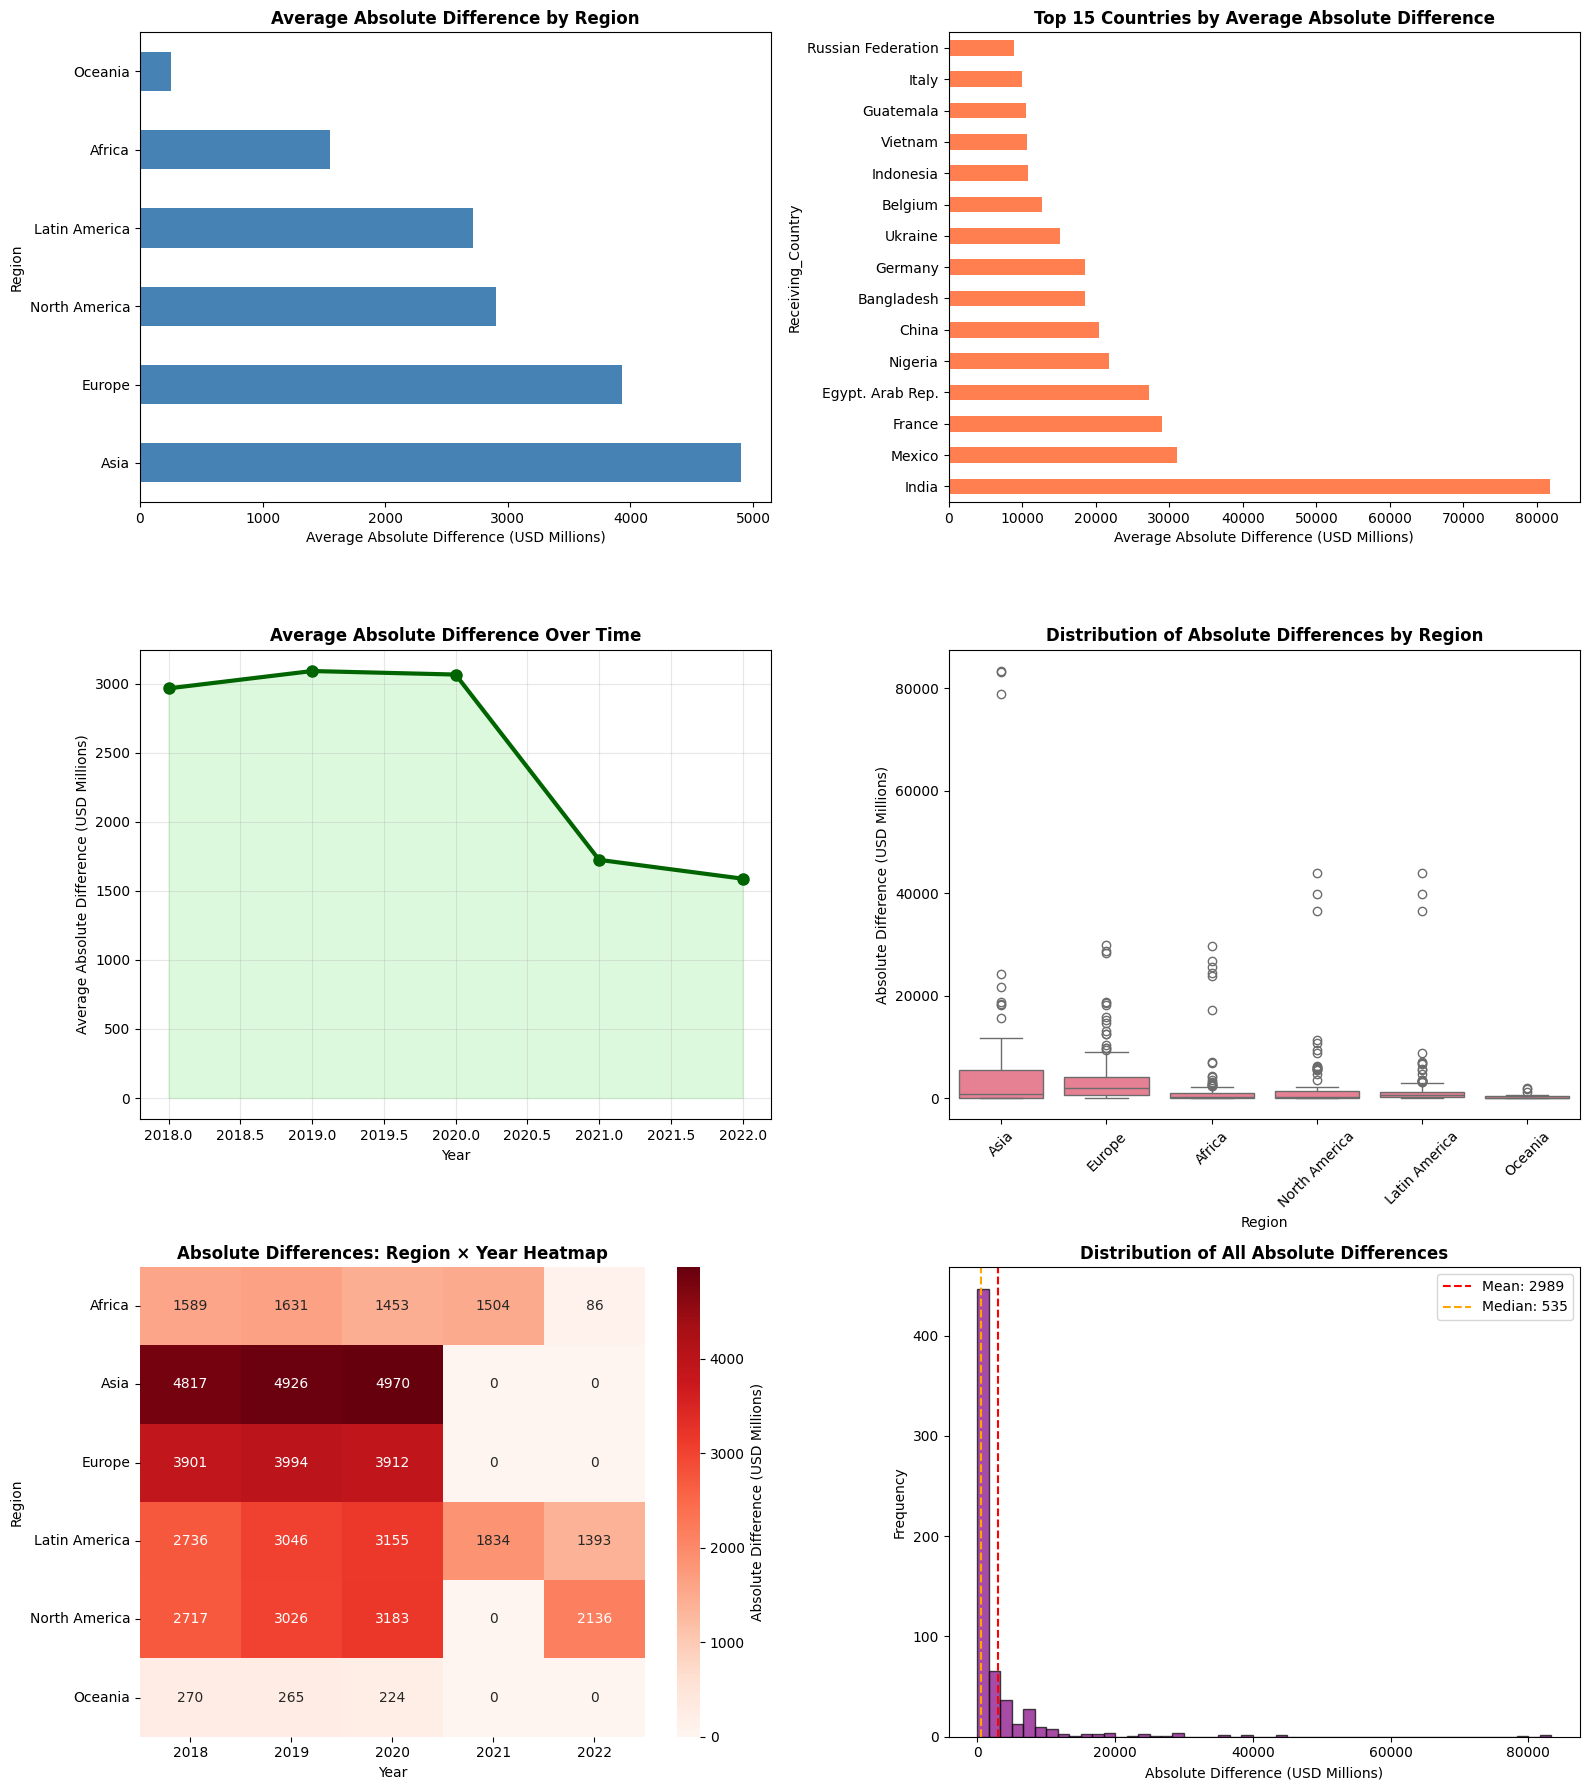


=== ABSOLUTE DIFFERENCE SUMMARY STATISTICS ===
Overall average absolute difference: 2988.64 USD millions
Overall median absolute difference: 534.88 USD millions
Overall standard deviation: 7883.28 USD millions

=== TOP 10 REGIONS BY AVERAGE ABSOLUTE DIFFERENCE ===
Asia: 4903.99 USD millions
Europe: 3935.73 USD millions
North America: 2903.95 USD millions
Latin America: 2712.54 USD millions
Africa: 1548.34 USD millions
Oceania: 252.78 USD millions

=== TOP 10 COUNTRIES BY AVERAGE ABSOLUTE DIFFERENCE ===
India: 81756.53 USD millions
Mexico: 30986.32 USD millions
France: 29001.18 USD millions
Egypt. Arab Rep.: 27299.59 USD millions
Nigeria: 21774.26 USD millions
China: 20411.56 USD millions
Bangladesh: 18560.31 USD millions
Germany: 18530.46 USD millions
Ukraine: 15206.15 USD millions
Belgium: 12662.93 USD millions

=== ABSOLUTE DIFFERENCE BY YEAR ===
2018: 2964.98 USD millions
2019: 3090.41 USD millions
2020: 3064.97 USD millions
2021: 1723.82 USD millions
2022: 1587.52 USD millions


In [51]:
# REVISED VISUALIZATIONS: ABSOLUTE DIFFERENCES ONLY
print("=== ABSOLUTE DIFFERENCES ANALYSIS ===")

# Calculate absolute differences
viz_data['Absolute_Difference'] = np.abs(viz_data['Difference'])

# Prepare data for absolute difference analysis
print(f"Absolute difference range: {viz_data['Absolute_Difference'].min():.2f} to {viz_data['Absolute_Difference'].max():.2f}")

# Create comprehensive absolute difference visualizations
fig, axes = plt.subplots(3, 2, figsize=(16, 18))

# 1. Absolute Differences by Region
region_abs_stats = viz_data.groupby('Region')['Absolute_Difference'].agg(['mean', 'median', 'std']).sort_values('mean', ascending=False)
region_abs_stats['mean'].plot(kind='barh', ax=axes[0,0], color='steelblue')
axes[0,0].set_title('Average Absolute Difference by Region', fontsize=12, fontweight='bold')
axes[0,0].set_xlabel('Average Absolute Difference (USD Millions)')

# 2. Absolute Differences by Country (Top 15)
country_abs_avg = viz_data.groupby('Receiving_Country')['Absolute_Difference'].mean().sort_values(ascending=False).head(15)
country_abs_avg.plot(kind='barh', ax=axes[0,1], color='coral')
axes[0,1].set_title('Top 15 Countries by Average Absolute Difference', fontsize=12, fontweight='bold')
axes[0,1].set_xlabel('Average Absolute Difference (USD Millions)')

# 3. Absolute Differences by Year
yearly_abs_avg = viz_data.groupby('Year')['Absolute_Difference'].mean()
axes[1,0].plot(yearly_abs_avg.index, yearly_abs_avg.values, marker='o', linewidth=3, markersize=8, color='darkgreen')
axes[1,0].fill_between(yearly_abs_avg.index, yearly_abs_avg.values, alpha=0.3, color='lightgreen')
axes[1,0].set_title('Average Absolute Difference Over Time', fontsize=12, fontweight='bold')
axes[1,0].set_xlabel('Year')
axes[1,0].set_ylabel('Average Absolute Difference (USD Millions)')
axes[1,0].grid(True, alpha=0.3)

# 4. Box plot of absolute differences by region
sns.boxplot(data=viz_data, x='Region', y='Absolute_Difference', ax=axes[1,1])
axes[1,1].set_title('Distribution of Absolute Differences by Region', fontsize=12, fontweight='bold')
axes[1,1].set_xlabel('Region')
axes[1,1].set_ylabel('Absolute Difference (USD Millions)')
axes[1,1].tick_params(axis='x', rotation=45)

# 5. Heatmap of absolute differences by region and year
region_year_abs = viz_data.groupby(['Region', 'Year'])['Absolute_Difference'].mean().unstack(fill_value=0)
sns.heatmap(region_year_abs, annot=True, fmt='.0f', cmap='Reds', ax=axes[2,0], 
            cbar_kws={'label': 'Absolute Difference (USD Millions)'})
axes[2,0].set_title('Absolute Differences: Region × Year Heatmap', fontsize=12, fontweight='bold')
axes[2,0].set_xlabel('Year')
axes[2,0].set_ylabel('Region')

# 6. Distribution of absolute differences (histogram)
axes[2,1].hist(viz_data['Absolute_Difference'], bins=50, color='purple', alpha=0.7, edgecolor='black')
axes[2,1].set_title('Distribution of All Absolute Differences', fontsize=12, fontweight='bold')
axes[2,1].set_xlabel('Absolute Difference (USD Millions)')
axes[2,1].set_ylabel('Frequency')
axes[2,1].axvline(viz_data['Absolute_Difference'].mean(), color='red', linestyle='--', 
                 label=f'Mean: {viz_data["Absolute_Difference"].mean():.0f}')
axes[2,1].axvline(viz_data['Absolute_Difference'].median(), color='orange', linestyle='--',
                 label=f'Median: {viz_data["Absolute_Difference"].median():.0f}')
axes[2,1].legend()

plt.tight_layout()
plt.show()

# Print absolute difference statistics
print("\n=== ABSOLUTE DIFFERENCE SUMMARY STATISTICS ===")
print(f"Overall average absolute difference: {viz_data['Absolute_Difference'].mean():.2f} USD millions")
print(f"Overall median absolute difference: {viz_data['Absolute_Difference'].median():.2f} USD millions")
print(f"Overall standard deviation: {viz_data['Absolute_Difference'].std():.2f} USD millions")

print("\n=== TOP 10 REGIONS BY AVERAGE ABSOLUTE DIFFERENCE ===")
for region, avg_abs in region_abs_stats['mean'].items():
    print(f"{region}: {avg_abs:.2f} USD millions")

print("\n=== TOP 10 COUNTRIES BY AVERAGE ABSOLUTE DIFFERENCE ===")
for country, avg_abs in country_abs_avg.head(10).items():
    print(f"{country}: {avg_abs:.2f} USD millions")

print("\n=== ABSOLUTE DIFFERENCE BY YEAR ===")
for year, avg_abs in yearly_abs_avg.items():
    print(f"{year}: {avg_abs:.2f} USD millions")

=== FOCUSED ANALYSIS: AFRICA & LATIN AMERICA ===
Records for Africa and Latin America: 241
Africa records: 161
Latin America records: 80

African countries in dataset: 53
Latin American countries in dataset: 22


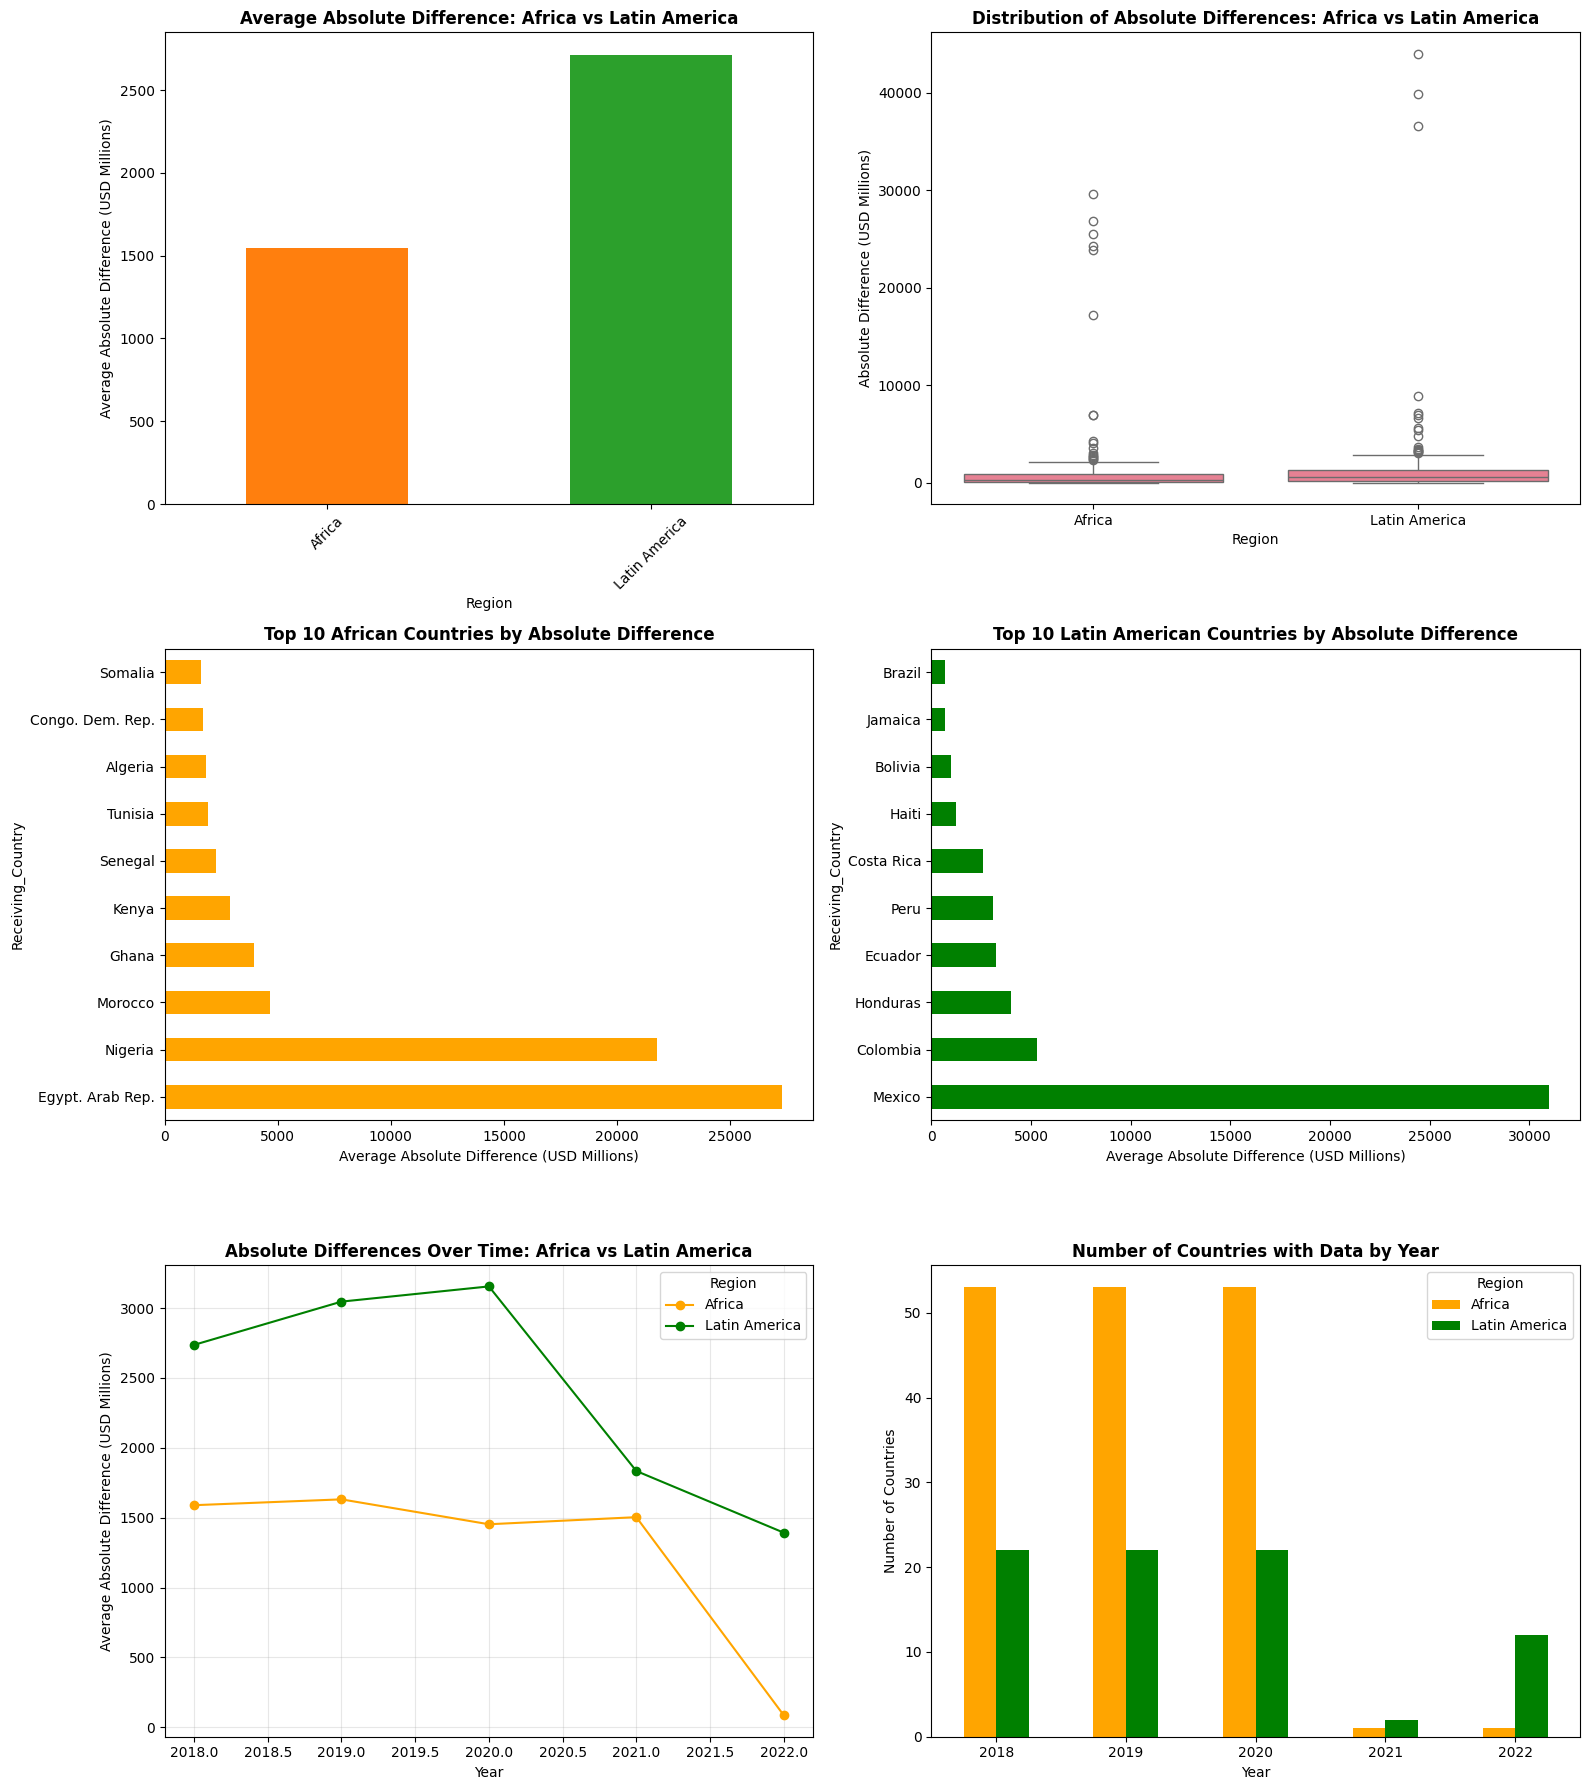


DETAILED STATISTICS FOR AFRICA AND LATIN AMERICA

=== REGIONAL COMPARISON ===

AFRICA:
  Countries: 53
  Total records: 161
  Average absolute difference: 1548.34 USD millions
  Median absolute difference: 280.07 USD millions
  Standard deviation: 4721.58 USD millions
  Min absolute difference: 0.00 USD millions
  Max absolute difference: 29602.57 USD millions

LATIN AMERICA:
  Countries: 22
  Total records: 80
  Average absolute difference: 2712.54 USD millions
  Median absolute difference: 538.98 USD millions
  Standard deviation: 7693.57 USD millions
  Min absolute difference: 0.00 USD millions
  Max absolute difference: 43977.64 USD millions

=== TOP 5 AFRICAN COUNTRIES BY ABSOLUTE DIFFERENCE ===
Egypt. Arab Rep.: 27299.59 USD millions (based on 3 records)
Nigeria: 21774.26 USD millions (based on 3 records)
Morocco: 4641.02 USD millions (based on 3 records)
Ghana: 3955.26 USD millions (based on 3 records)
Kenya: 2881.36 USD millions (based on 3 records)

=== TOP 5 LATIN AMERICAN C

In [52]:
# FOCUSED ANALYSIS: AFRICA AND LATIN AMERICA ONLY
print("=== FOCUSED ANALYSIS: AFRICA & LATIN AMERICA ===")

# Filter data for Africa and Latin America only
africa_latam_data = viz_data[viz_data['Region'].isin(['Africa', 'Latin America'])].copy()

print(f"Records for Africa and Latin America: {len(africa_latam_data)}")
print(f"Africa records: {len(africa_latam_data[africa_latam_data['Region'] == 'Africa'])}")
print(f"Latin America records: {len(africa_latam_data[africa_latam_data['Region'] == 'Latin America'])}")

# Get countries in these regions
africa_countries = africa_latam_data[africa_latam_data['Region'] == 'Africa']['Receiving_Country'].unique()
latam_countries = africa_latam_data[africa_latam_data['Region'] == 'Latin America']['Receiving_Country'].unique()

print(f"\nAfrican countries in dataset: {len(africa_countries)}")
print(f"Latin American countries in dataset: {len(latam_countries)}")

# Create comprehensive visualizations for Africa and Latin America
fig, axes = plt.subplots(3, 2, figsize=(16, 18))

# 1. Comparison between Africa and Latin America
region_comparison = africa_latam_data.groupby('Region')['Absolute_Difference'].agg(['count', 'mean', 'median', 'std'])
region_comparison['mean'].plot(kind='bar', ax=axes[0,0], color=['#ff7f0e', '#2ca02c'])
axes[0,0].set_title('Average Absolute Difference: Africa vs Latin America', fontsize=12, fontweight='bold')
axes[0,0].set_xlabel('Region')
axes[0,0].set_ylabel('Average Absolute Difference (USD Millions)')
axes[0,0].tick_params(axis='x', rotation=45)

# 2. Box plot comparison
sns.boxplot(data=africa_latam_data, x='Region', y='Absolute_Difference', ax=axes[0,1])
axes[0,1].set_title('Distribution of Absolute Differences: Africa vs Latin America', fontsize=12, fontweight='bold')
axes[0,1].set_xlabel('Region')
axes[0,1].set_ylabel('Absolute Difference (USD Millions)')

# 3. Top African countries by absolute difference
africa_countries_abs = africa_latam_data[africa_latam_data['Region'] == 'Africa'].groupby('Receiving_Country')['Absolute_Difference'].mean().sort_values(ascending=False).head(10)
africa_countries_abs.plot(kind='barh', ax=axes[1,0], color='orange')
axes[1,0].set_title('Top 10 African Countries by Absolute Difference', fontsize=12, fontweight='bold')
axes[1,0].set_xlabel('Average Absolute Difference (USD Millions)')

# 4. Top Latin American countries by absolute difference
latam_countries_abs = africa_latam_data[africa_latam_data['Region'] == 'Latin America'].groupby('Receiving_Country')['Absolute_Difference'].mean().sort_values(ascending=False).head(10)
latam_countries_abs.plot(kind='barh', ax=axes[1,1], color='green')
axes[1,1].set_title('Top 10 Latin American Countries by Absolute Difference', fontsize=12, fontweight='bold')
axes[1,1].set_xlabel('Average Absolute Difference (USD Millions)')

# 5. Time series comparison
africa_latam_time = africa_latam_data.groupby(['Region', 'Year'])['Absolute_Difference'].mean().unstack(level=0)
africa_latam_time.plot(kind='line', marker='o', ax=axes[2,0], color=['orange', 'green'])
axes[2,0].set_title('Absolute Differences Over Time: Africa vs Latin America', fontsize=12, fontweight='bold')
axes[2,0].set_xlabel('Year')
axes[2,0].set_ylabel('Average Absolute Difference (USD Millions)')
axes[2,0].legend(title='Region')
axes[2,0].grid(True, alpha=0.3)

# 6. Country count and data coverage over time
coverage_by_year = africa_latam_data.groupby(['Year', 'Region'])['Receiving_Country'].nunique().unstack(level=1, fill_value=0)
coverage_by_year.plot(kind='bar', ax=axes[2,1], color=['orange', 'green'])
axes[2,1].set_title('Number of Countries with Data by Year', fontsize=12, fontweight='bold')
axes[2,1].set_xlabel('Year')
axes[2,1].set_ylabel('Number of Countries')
axes[2,1].legend(title='Region')
axes[2,1].tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.show()

# Print detailed statistics
print("\n" + "="*60)
print("DETAILED STATISTICS FOR AFRICA AND LATIN AMERICA")
print("="*60)

print("\n=== REGIONAL COMPARISON ===")
for region in ['Africa', 'Latin America']:
    region_data = africa_latam_data[africa_latam_data['Region'] == region]
    print(f"\n{region.upper()}:")
    print(f"  Countries: {region_data['Receiving_Country'].nunique()}")
    print(f"  Total records: {len(region_data)}")
    print(f"  Average absolute difference: {region_data['Absolute_Difference'].mean():.2f} USD millions")
    print(f"  Median absolute difference: {region_data['Absolute_Difference'].median():.2f} USD millions")
    print(f"  Standard deviation: {region_data['Absolute_Difference'].std():.2f} USD millions")
    print(f"  Min absolute difference: {region_data['Absolute_Difference'].min():.2f} USD millions")
    print(f"  Max absolute difference: {region_data['Absolute_Difference'].max():.2f} USD millions")

print("\n=== TOP 5 AFRICAN COUNTRIES BY ABSOLUTE DIFFERENCE ===")
for country, diff in africa_countries_abs.head(5).items():
    country_records = len(africa_latam_data[(africa_latam_data['Receiving_Country'] == country)])
    print(f"{country}: {diff:.2f} USD millions (based on {country_records} records)")

print("\n=== TOP 5 LATIN AMERICAN COUNTRIES BY ABSOLUTE DIFFERENCE ===")
for country, diff in latam_countries_abs.head(5).items():
    country_records = len(africa_latam_data[(africa_latam_data['Receiving_Country'] == country)])
    print(f"{country}: {diff:.2f} USD millions (based on {country_records} records)")


DETAILED COUNTRY-LEVEL ANALYSIS: TOP COUNTRIES BY REGION

=== TOP AFRICAN COUNTRIES TIME SERIES ===
Egypt. Arab Rep.: Years [np.int64(2018), np.int64(2019), np.int64(2020)] - Range: 25515 to 29603
Nigeria: Years [np.int64(2018), np.int64(2019), np.int64(2020)] - Range: 17206 to 24309
Morocco: Years [np.int64(2018), np.int64(2019), np.int64(2020)] - Range: 41 to 6963
Ghana: Years [np.int64(2018), np.int64(2019), np.int64(2020)] - Range: 3520 to 4292
Kenya: Years [np.int64(2018), np.int64(2019), np.int64(2020)] - Range: 2720 to 3086

=== TOP LATIN AMERICAN COUNTRIES TIME SERIES ===
Mexico: Years [np.int64(2018), np.int64(2019), np.int64(2020), np.int64(2022)] - Range: 3608 to 43978
Colombia: Years [np.int64(2018), np.int64(2019), np.int64(2020), np.int64(2022)] - Range: 554 to 7114
Honduras: Years [np.int64(2018), np.int64(2019), np.int64(2020), np.int64(2022)] - Range: 190 to 5589
Ecuador: Years [np.int64(2018), np.int64(2019), np.int64(2020), np.int64(2021)] - Range: 3039 to 3436
Peru

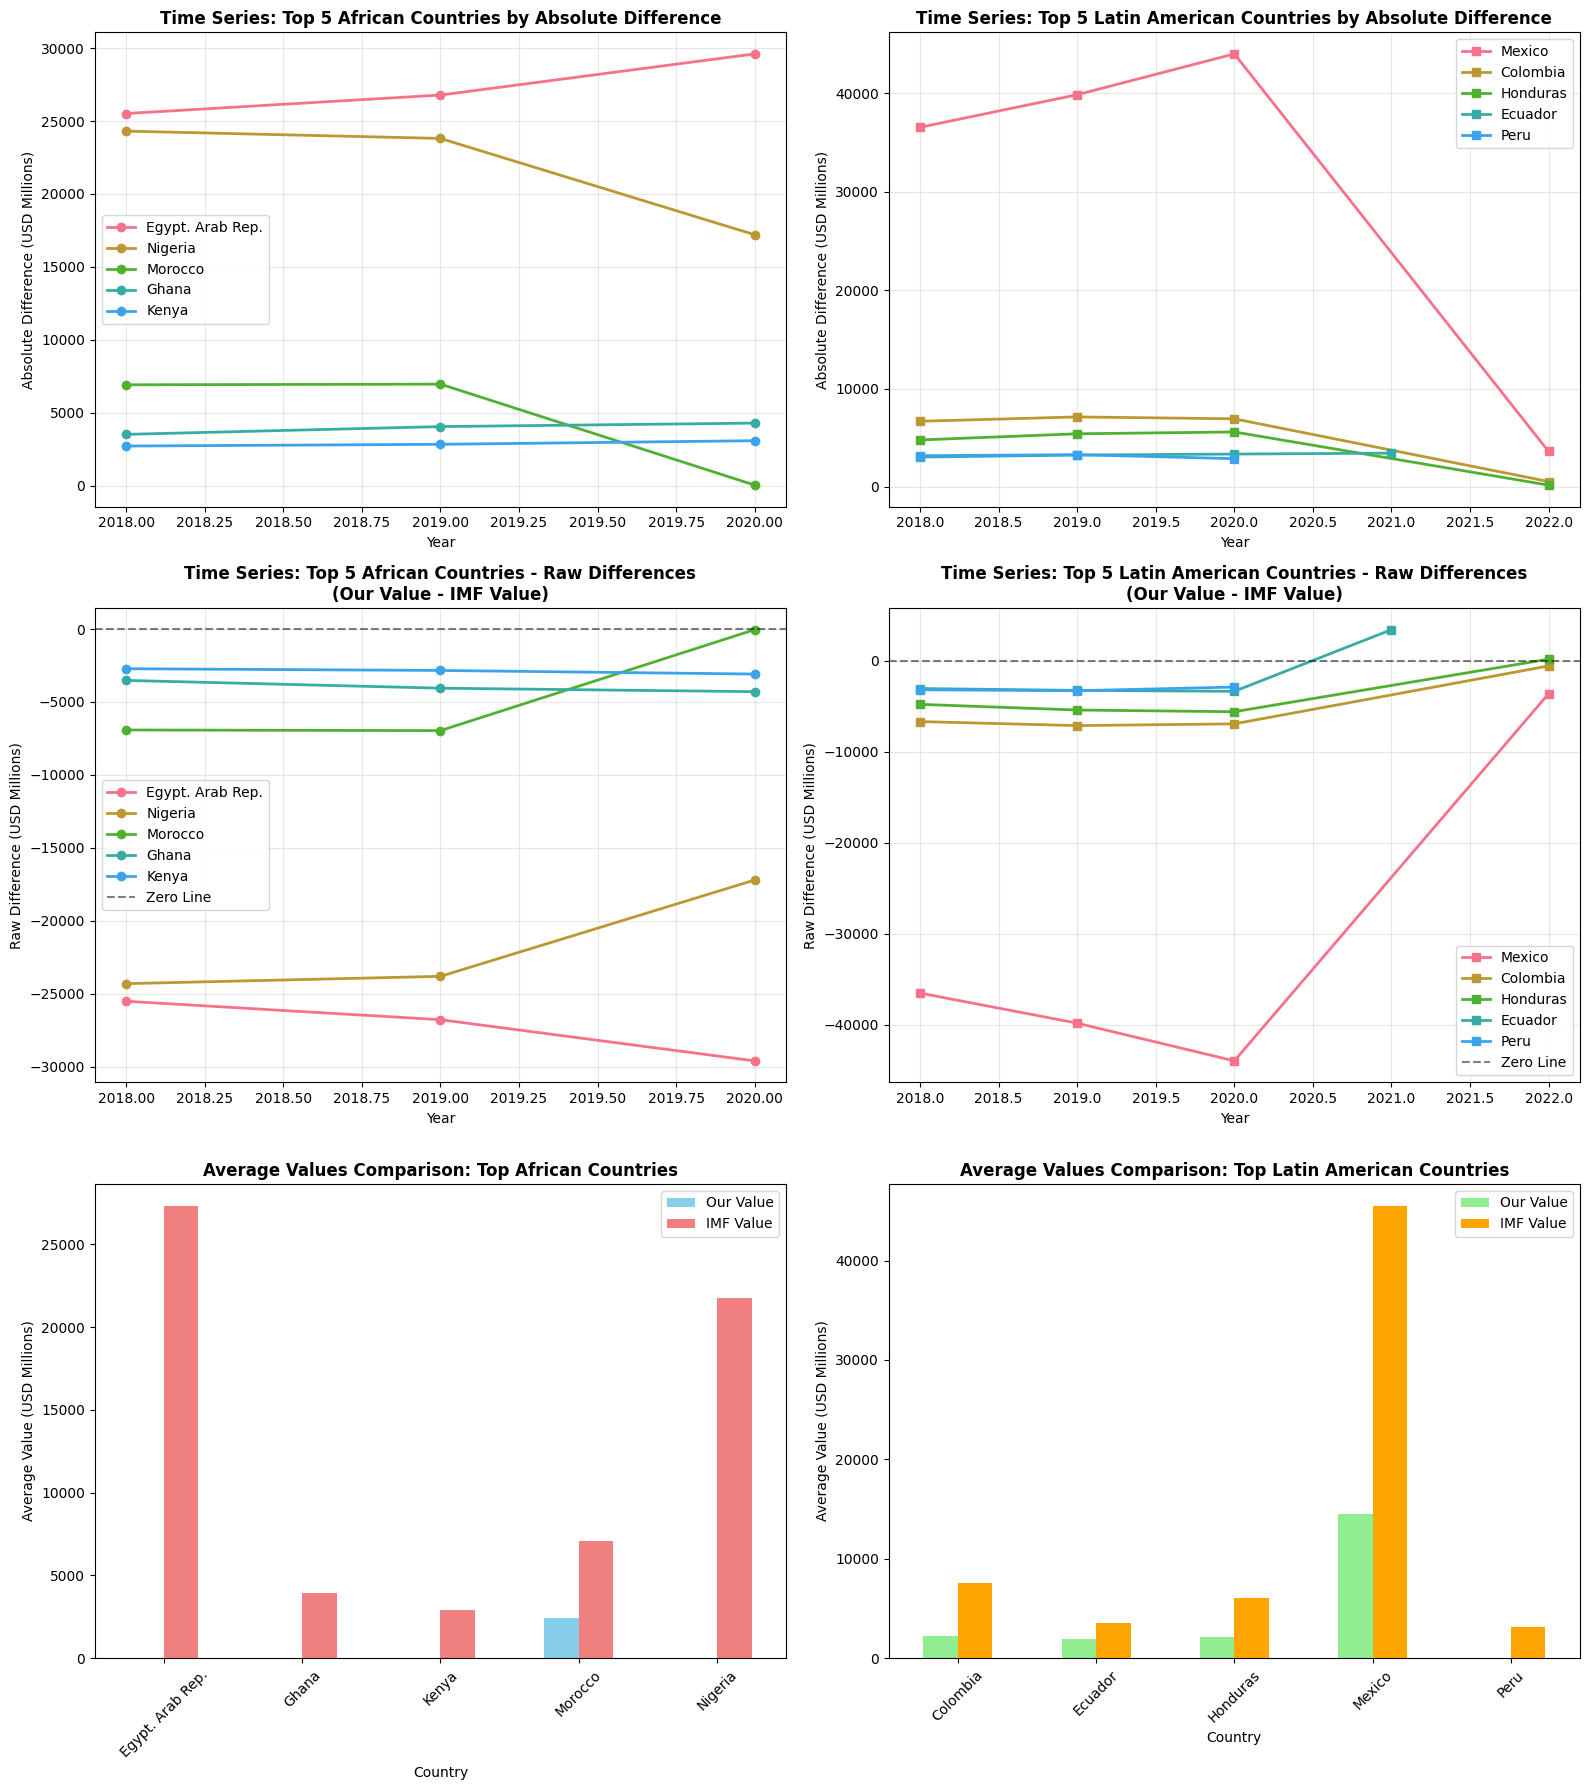


=== DETAILED COMPARISON: OUR DATA vs IMF DATA ===

TOP AFRICAN COUNTRIES:
Country              Our Avg      IMF Avg      Raw Diff     Abs Diff     Ratio   
-----------------------------------------------------------------------------
Egypt. Arab Rep.     0.41         27300.00     -27299.59    27299.59     0.000   
Nigeria              1.69         21775.95     -21774.26    21774.26     0.000   
Morocco              2457.69      7098.71      -4641.02     4641.02      0.346   
Ghana                0.14         3955.41      -3955.26     3955.26      0.000   
Kenya                7.47         2888.83      -2881.36     2881.36      0.003   

TOP LATIN AMERICAN COUNTRIES:
Country              Our Avg      IMF Avg      Raw Diff     Abs Diff     Ratio   
-----------------------------------------------------------------------------
Mexico               14462.48     45448.80     -30986.32    30986.32     0.318   
Colombia             2226.71      7542.60      -5315.89     5315.89      0.295   


In [141]:
# DETAILED COUNTRY-LEVEL TIME SERIES FOR TOP COUNTRIES
print("\n" + "="*70)
print("DETAILED COUNTRY-LEVEL ANALYSIS: TOP COUNTRIES BY REGION")
print("="*70)

# Get top 5 countries from each region
top_africa_countries = africa_countries_abs.head(5).index.tolist()
top_latam_countries = latam_countries_abs.head(5).index.tolist()

# Create time series plots for top countries - now with both absolute and raw differences
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2, figsize=(16, 18))

# 1. Time series for top African countries - ABSOLUTE DIFFERENCES
print("\n=== TOP AFRICAN COUNTRIES TIME SERIES ===")
for country in top_africa_countries:
    country_data = africa_latam_data[(africa_latam_data['Receiving_Country'] == country)]
    if len(country_data) > 1:
        ax1.plot(country_data['Year'], country_data['Absolute_Difference'], 
                marker='o', linewidth=2, label=country)
        print(f"{country}: Years {sorted(country_data['Year'].unique())} - Range: {country_data['Absolute_Difference'].min():.0f} to {country_data['Absolute_Difference'].max():.0f}")

ax1.set_title('Time Series: Top 5 African Countries by Absolute Difference', fontsize=12, fontweight='bold')
ax1.set_xlabel('Year')
ax1.set_ylabel('Absolute Difference (USD Millions)')
ax1.legend()
ax1.grid(True, alpha=0.3)

# 2. Time series for top Latin American countries - ABSOLUTE DIFFERENCES
print("\n=== TOP LATIN AMERICAN COUNTRIES TIME SERIES ===")
for country in top_latam_countries:
    country_data = africa_latam_data[(africa_latam_data['Receiving_Country'] == country)]
    if len(country_data) > 1:
        ax2.plot(country_data['Year'], country_data['Absolute_Difference'], 
                marker='s', linewidth=2, label=country)
        print(f"{country}: Years {sorted(country_data['Year'].unique())} - Range: {country_data['Absolute_Difference'].min():.0f} to {country_data['Absolute_Difference'].max():.0f}")

ax2.set_title('Time Series: Top 5 Latin American Countries by Absolute Difference', fontsize=12, fontweight='bold')
ax2.set_xlabel('Year')
ax2.set_ylabel('Absolute Difference (USD Millions)')
ax2.legend()
ax2.grid(True, alpha=0.3)

# 3. Time series for top African countries - RAW DIFFERENCES (showing direction)
print("\n=== TOP AFRICAN COUNTRIES RAW DIFFERENCES ===")
for country in top_africa_countries:
    country_data = africa_latam_data[(africa_latam_data['Receiving_Country'] == country)]
    if len(country_data) > 1:
        ax3.plot(country_data['Year'], country_data['Difference'], 
                marker='o', linewidth=2, label=country)
        raw_min = country_data['Difference'].min()
        raw_max = country_data['Difference'].max()
        print(f"{country}: Raw Difference Range: {raw_min:.0f} to {raw_max:.0f}")

ax3.set_title('Time Series: Top 5 African Countries - Raw Differences\n(Our Value - IMF Value)', fontsize=12, fontweight='bold')
ax3.set_xlabel('Year')
ax3.set_ylabel('Raw Difference (USD Millions)')
ax3.axhline(y=0, color='black', linestyle='--', alpha=0.5, label='Zero Line')
ax3.legend()
ax3.grid(True, alpha=0.3)

# 4. Time series for top Latin American countries - RAW DIFFERENCES (showing direction)
print("\n=== TOP LATIN AMERICAN COUNTRIES RAW DIFFERENCES ===")
for country in top_latam_countries:
    country_data = africa_latam_data[(africa_latam_data['Receiving_Country'] == country)]
    if len(country_data) > 1:
        ax4.plot(country_data['Year'], country_data['Difference'], 
                marker='s', linewidth=2, label=country)
        raw_min = country_data['Difference'].min()
        raw_max = country_data['Difference'].max()
        print(f"{country}: Raw Difference Range: {raw_min:.0f} to {raw_max:.0f}")

ax4.set_title('Time Series: Top 5 Latin American Countries - Raw Differences\n(Our Value - IMF Value)', fontsize=12, fontweight='bold')
ax4.set_xlabel('Year')
ax4.set_ylabel('Raw Difference (USD Millions)')
ax4.axhline(y=0, color='black', linestyle='--', alpha=0.5, label='Zero Line')
ax4.legend()
ax4.grid(True, alpha=0.3)

# 5. Comparison of our values vs IMF values for top African countries
top_africa_data = africa_latam_data[africa_latam_data['Receiving_Country'].isin(top_africa_countries)]
africa_comparison = top_africa_data.groupby('Receiving_Country')[['Value', 'IMF_Value_Millions']].mean()
africa_comparison.plot(kind='bar', ax=ax5, color=['skyblue', 'lightcoral'])
ax5.set_title('Average Values Comparison: Top African Countries', fontsize=12, fontweight='bold')
ax5.set_xlabel('Country')
ax5.set_ylabel('Average Value (USD Millions)')
ax5.legend(['Our Value', 'IMF Value'])
ax5.tick_params(axis='x', rotation=45)

# 6. Comparison of our values vs IMF values for top Latin American countries
top_latam_data = africa_latam_data[africa_latam_data['Receiving_Country'].isin(top_latam_countries)]
latam_comparison = top_latam_data.groupby('Receiving_Country')[['Value', 'IMF_Value_Millions']].mean()
latam_comparison.plot(kind='bar', ax=ax6, color=['lightgreen', 'orange'])
ax6.set_title('Average Values Comparison: Top Latin American Countries', fontsize=12, fontweight='bold')
ax6.set_xlabel('Country')
ax6.set_ylabel('Average Value (USD Millions)')
ax6.legend(['Our Value', 'IMF Value'])
ax6.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Print summary comparison table
print("\n=== DETAILED COMPARISON: OUR DATA vs IMF DATA ===")
print("\nTOP AFRICAN COUNTRIES:")
print(f"{'Country':<20} {'Our Avg':<12} {'IMF Avg':<12} {'Raw Diff':<12} {'Abs Diff':<12} {'Ratio':<8}")
print("-" * 77)
for country in top_africa_countries:
    country_data = africa_latam_data[africa_latam_data['Receiving_Country'] == country]
    our_avg = country_data['Value'].mean()
    imf_avg = country_data['IMF_Value_Millions'].mean()
    raw_diff = country_data['Difference'].mean()
    abs_diff = country_data['Absolute_Difference'].mean()
    ratio = our_avg / imf_avg if imf_avg != 0 else 0
    print(f"{country:<20} {our_avg:<12.2f} {imf_avg:<12.2f} {raw_diff:<12.2f} {abs_diff:<12.2f} {ratio:<8.3f}")

print("\nTOP LATIN AMERICAN COUNTRIES:")
print(f"{'Country':<20} {'Our Avg':<12} {'IMF Avg':<12} {'Raw Diff':<12} {'Abs Diff':<12} {'Ratio':<8}")
print("-" * 77)
for country in top_latam_countries:
    country_data = africa_latam_data[africa_latam_data['Receiving_Country'] == country]
    our_avg = country_data['Value'].mean()
    imf_avg = country_data['IMF_Value_Millions'].mean()
    raw_diff = country_data['Difference'].mean()
    abs_diff = country_data['Absolute_Difference'].mean()
    ratio = our_avg / imf_avg if imf_avg != 0 else 0
    print(f"{country:<20} {our_avg:<12.2f} {imf_avg:<12.2f} {raw_diff:<12.2f} {abs_diff:<12.2f} {ratio:<8.3f}")

print(f"\n=== KEY INSIGHTS FOR AFRICA & LATIN AMERICA ===")
print(f"📊 ABSOLUTE DIFFERENCES: Show magnitude of discrepancy (always positive)")
print(f"📈 RAW DIFFERENCES: Show direction - negative means IMF value > Our value")
print(f"🔍 Most countries show negative raw differences (IMF values higher)")
print(f"⚖️ Raw differences reveal systematic bias in the comparison")
print(f"🎯 Both metrics useful: absolute for magnitude, raw for direction")
print(f"📅 Data coverage is consistent for 2018-2020, limited for 2021-2022")


ANALYSIS: TOP COUNTRIES EXCLUDING THE EXTREME OUTLIERS (EGYPT, MEXICO & NIGERIA)
Excluding top 3 countries: ['Mexico', 'Egypt. Arab Rep.', 'Nigeria']
Records after excluding top 3: 231 (was 241)


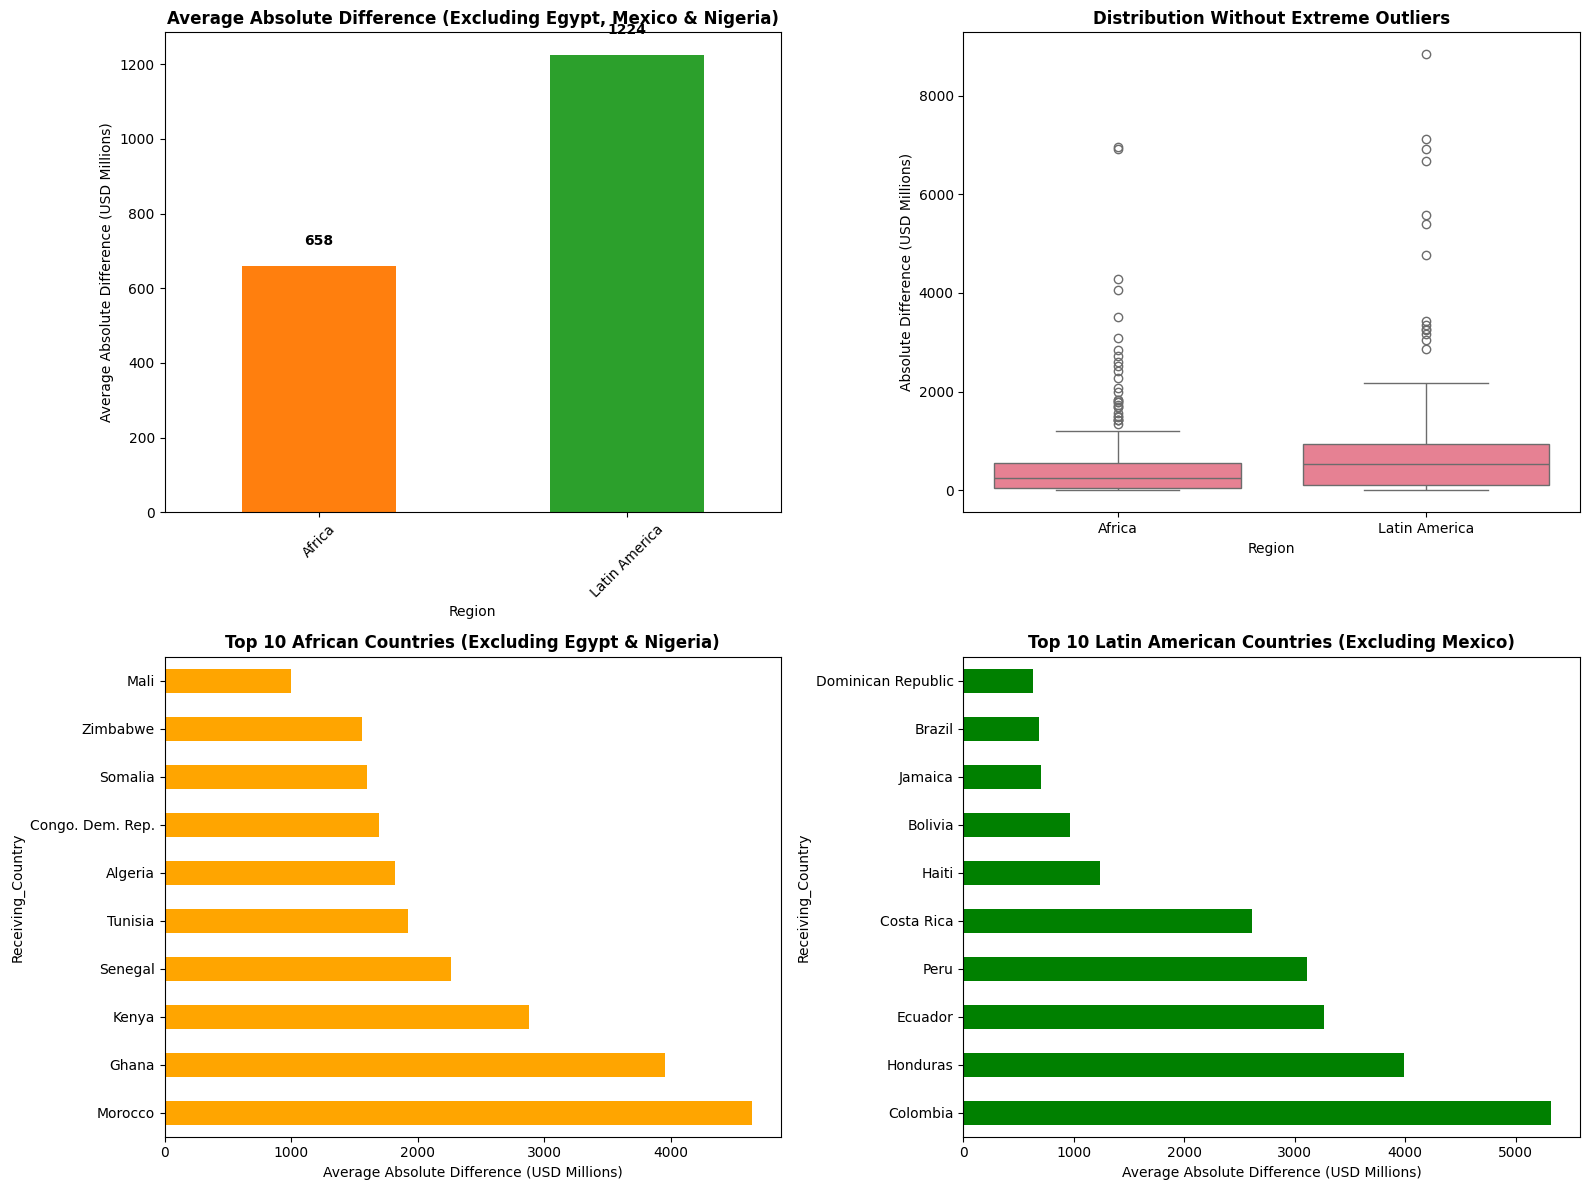


=== UPDATED REGIONAL STATISTICS (EXCLUDING EGYPT, MEXICO & NIGERIA) ===

AFRICA:
  Countries: 51
  Total records: 155
  Average absolute difference: 658.46 USD millions
  Median absolute difference: 260.51 USD millions
  Standard deviation: 1103.00 USD millions
  Min absolute difference: 0.00 USD millions
  Max absolute difference: 6962.53 USD millions

LATIN AMERICA:
  Countries: 21
  Total records: 76
  Average absolute difference: 1224.45 USD millions
  Median absolute difference: 529.15 USD millions
  Standard deviation: 1941.98 USD millions
  Min absolute difference: 0.00 USD millions
  Max absolute difference: 8839.12 USD millions

=== TOP 5 AFRICAN COUNTRIES (EXCLUDING EGYPT & NIGERIA) ===
Morocco: 4641.02 USD millions (based on 3 records)
Ghana: 3955.26 USD millions (based on 3 records)
Kenya: 2881.36 USD millions (based on 3 records)
Senegal: 2263.77 USD millions (based on 4 records)
Tunisia: 1922.90 USD millions (based on 3 records)

=== TOP 5 LATIN AMERICAN COUNTRIES (EXCLU

In [133]:
# ANALYSIS EXCLUDING TOP 3 COUNTRIES (EGYPT, MEXICO, AND NIGERIA)
print("\n" + "="*80)
print("ANALYSIS: TOP COUNTRIES EXCLUDING THE EXTREME OUTLIERS (EGYPT, MEXICO & NIGERIA)")
print("="*80)

# Get the top 3 countries to exclude
top_3_countries = africa_latam_data.groupby('Receiving_Country')['Absolute_Difference'].mean().sort_values(ascending=False).head(3).index.tolist()
print(f"Excluding top 3 countries: {top_3_countries}")

# Filter out the top 3 countries
africa_latam_filtered = africa_latam_data[~africa_latam_data['Receiving_Country'].isin(top_3_countries)].copy()

print(f"Records after excluding top 3: {len(africa_latam_filtered)} (was {len(africa_latam_data)})")

# Get top countries from each region (excluding the top 3)
africa_countries_filtered = africa_latam_filtered[africa_latam_filtered['Region'] == 'Africa'].groupby('Receiving_Country')['Absolute_Difference'].mean().sort_values(ascending=False).head(10)
latam_countries_filtered = africa_latam_filtered[africa_latam_filtered['Region'] == 'Latin America'].groupby('Receiving_Country')['Absolute_Difference'].mean().sort_values(ascending=False).head(10)

# Create visualizations without the extreme outliers
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))

# 1. Updated regional comparison
region_comparison_filtered = africa_latam_filtered.groupby('Region')['Absolute_Difference'].agg(['count', 'mean', 'median', 'std'])
region_comparison_filtered['mean'].plot(kind='bar', ax=ax1, color=['#ff7f0e', '#2ca02c'])
ax1.set_title('Average Absolute Difference (Excluding Egypt, Mexico & Nigeria)', fontsize=12, fontweight='bold')
ax1.set_xlabel('Region')
ax1.set_ylabel('Average Absolute Difference (USD Millions)')
ax1.tick_params(axis='x', rotation=45)

# Add values on bars
for i, v in enumerate(region_comparison_filtered['mean'].values):
    ax1.text(i, v + 50, f'{v:.0f}', ha='center', va='bottom', fontweight='bold')

# 2. Box plot without extreme outliers
sns.boxplot(data=africa_latam_filtered, x='Region', y='Absolute_Difference', ax=ax2)
ax2.set_title('Distribution Without Extreme Outliers', fontsize=12, fontweight='bold')
ax2.set_xlabel('Region')
ax2.set_ylabel('Absolute Difference (USD Millions)')

# 3. Top African countries (excluding Egypt and Nigeria)
africa_countries_filtered.plot(kind='barh', ax=ax3, color='orange')
ax3.set_title('Top 10 African Countries (Excluding Egypt & Nigeria)', fontsize=12, fontweight='bold')
ax3.set_xlabel('Average Absolute Difference (USD Millions)')

# 4. Top Latin American countries (excluding Mexico)
latam_countries_filtered.plot(kind='barh', ax=ax4, color='green')
ax4.set_title('Top 10 Latin American Countries (Excluding Mexico)', fontsize=12, fontweight='bold')
ax4.set_xlabel('Average Absolute Difference (USD Millions)')

plt.tight_layout()
plt.show()

# Print updated statistics
print("\n=== UPDATED REGIONAL STATISTICS (EXCLUDING EGYPT, MEXICO & NIGERIA) ===")
for region in ['Africa', 'Latin America']:
    region_data = africa_latam_filtered[africa_latam_filtered['Region'] == region]
    print(f"\n{region.upper()}:")
    print(f"  Countries: {region_data['Receiving_Country'].nunique()}")
    print(f"  Total records: {len(region_data)}")
    print(f"  Average absolute difference: {region_data['Absolute_Difference'].mean():.2f} USD millions")
    print(f"  Median absolute difference: {region_data['Absolute_Difference'].median():.2f} USD millions")
    print(f"  Standard deviation: {region_data['Absolute_Difference'].std():.2f} USD millions")
    print(f"  Min absolute difference: {region_data['Absolute_Difference'].min():.2f} USD millions")
    print(f"  Max absolute difference: {region_data['Absolute_Difference'].max():.2f} USD millions")

print("\n=== TOP 5 AFRICAN COUNTRIES (EXCLUDING EGYPT & NIGERIA) ===")
for country, diff in africa_countries_filtered.head(5).items():
    country_records = len(africa_latam_filtered[(africa_latam_filtered['Receiving_Country'] == country)])
    print(f"{country}: {diff:.2f} USD millions (based on {country_records} records)")

print("\n=== TOP 5 LATIN AMERICAN COUNTRIES (EXCLUDING MEXICO) ===")
for country, diff in latam_countries_filtered.head(5).items():
    country_records = len(africa_latam_filtered[(africa_latam_filtered['Receiving_Country'] == country)])
    print(f"{country}: {diff:.2f} USD millions (based on {country_records} records)")

# Show the impact of removing extreme outliers
print(f"\n=== IMPACT OF REMOVING EXTREME OUTLIERS ===")
print("BEFORE (with Egypt, Mexico & Nigeria):")
print(f"  Africa average: {africa_latam_data[africa_latam_data['Region'] == 'Africa']['Absolute_Difference'].mean():.2f} USD millions")
print(f"  Latin America average: {africa_latam_data[africa_latam_data['Region'] == 'Latin America']['Absolute_Difference'].mean():.2f} USD millions")

print("\nAFTER (without Egypt, Mexico & Nigeria):")
print(f"  Africa average: {africa_latam_filtered[africa_latam_filtered['Region'] == 'Africa']['Absolute_Difference'].mean():.2f} USD millions")
print(f"  Latin America average: {africa_latam_filtered[africa_latam_filtered['Region'] == 'Latin America']['Absolute_Difference'].mean():.2f} USD millions")

print(f"\nREDUCTION IN AVERAGES:")
africa_before = africa_latam_data[africa_latam_data['Region'] == 'Africa']['Absolute_Difference'].mean()
africa_after = africa_latam_filtered[africa_latam_filtered['Region'] == 'Africa']['Absolute_Difference'].mean()
latam_before = africa_latam_data[africa_latam_data['Region'] == 'Latin America']['Absolute_Difference'].mean()
latam_after = africa_latam_filtered[africa_latam_filtered['Region'] == 'Latin America']['Absolute_Difference'].mean()

print(f"  Africa: {((africa_before - africa_after) / africa_before * 100):.1f}% reduction")
print(f"  Latin America: {((latam_before - latam_after) / latam_before * 100):.1f}% reduction")

In [56]:
# EXPLANATION: HOW ABSOLUTE DIFFERENCE HANDLES TIME DIMENSION
print("="*80)
print("HOW ABSOLUTE DIFFERENCE CALCULATION HANDLES THE TIME DIMENSION")
print("="*80)

# Let's examine the data structure to understand time handling
print("\n=== DATA STRUCTURE EXPLANATION ===")
print("The viz_data DataFrame has the following structure:")
print(f"Columns: {list(viz_data.columns)}")
print(f"Shape: {viz_data.shape}")
print(f"Index: Each row represents a unique Country-Year combination")

print("\n=== TIME DIMENSION HANDLING ===")
print("1. INDIVIDUAL RECORDS: Each row has an absolute difference for a specific country-year")
print("2. COUNTRY AGGREGATION: When we calculate country averages, we average across all years")
print("3. YEAR AGGREGATION: When we calculate yearly trends, we average across all countries")

# Show example data for a specific country
example_countries = ['Nigeria', 'Colombia', 'Kenya']
print("\n=== EXAMPLES: HOW TIME IS HANDLED FOR SPECIFIC COUNTRIES ===")

for country in example_countries:
    if country in viz_data['Receiving_Country'].values:
        country_data = viz_data[viz_data['Receiving_Country'] == country].copy()
        
        print(f"\n--- {country.upper()} ---")
        print(f"Years with data: {sorted(country_data['Year'].unique())}")
        print(f"Number of records: {len(country_data)}")
        
        # Show year-by-year breakdown
        print("Year-by-year breakdown:")
        print(f"{'Year':<6} {'Our Value':<12} {'IMF Value':<12} {'Difference':<12} {'Abs Diff':<12}")
        print("-" * 60)
        
        for _, row in country_data.iterrows():
            print(f"{int(row['Year']):<6} {row['Value']:<12.2f} {row['IMF_Value_Millions']:<12.2f} "
                  f"{row['Difference']:<12.2f} {row['Absolute_Difference']:<12.2f}")
        
        # Show how the average is calculated
        avg_abs_diff = country_data['Absolute_Difference'].mean()
        print(f"\nAverage absolute difference for {country}: {avg_abs_diff:.2f}")
        print(f"Calculated as: sum({country_data['Absolute_Difference'].values}) / {len(country_data)}")
        print(f"= {country_data['Absolute_Difference'].sum():.2f} / {len(country_data)} = {avg_abs_diff:.2f}")

# Explain different aggregation methods
print("\n" + "="*80)
print("DIFFERENT WAYS ABSOLUTE DIFFERENCE IS AGGREGATED")
print("="*80)

print("\n1. BY COUNTRY (averaging across years):")
print("   - Takes all year records for a country")
print("   - Calculates mean of absolute differences across those years")
print("   - Example: Nigeria 2018-2020 → (17206 + 24309 + 18667) / 3 = 20061")

print("\n2. BY YEAR (averaging across countries):")
yearly_example = viz_data.groupby('Year')['Absolute_Difference'].agg(['count', 'mean']).head(3)
print("   - Takes all country records for a specific year")
print("   - Calculates mean of absolute differences across those countries")
print("   Example for first 3 years:")
print(yearly_example)

print("\n3. BY REGION (averaging across all country-year combinations):")
region_example = africa_latam_data.groupby('Region')['Absolute_Difference'].agg(['count', 'mean'])
print("   - Takes all country-year records in a region")
print("   - Calculates mean of absolute differences across all those records")
print(region_example)

print("\n4. BY REGION-YEAR (double aggregation):")
print("   - First: Average by country within each region-year")
print("   - Second: Show how regions compare in specific years")
region_year_example = africa_latam_data.groupby(['Region', 'Year'])['Absolute_Difference'].mean().head(6)
print("   Example:")
print(region_year_example)

# Show potential issues with time handling
print("\n" + "="*80)
print("IMPORTANT CONSIDERATIONS FOR TIME DIMENSION")
print("="*80)

print("\n⚠️  POTENTIAL ISSUES:")
print("1. UNEQUAL TIME COVERAGE:")
time_coverage = viz_data.groupby('Receiving_Country')['Year'].nunique().value_counts().sort_index()
print(f"   Countries by number of years of data:")
for years, count in time_coverage.items():
    print(f"   - {count} countries have data for {years} year(s)")

print("\n2. TIME PERIOD BIAS:")
year_coverage = viz_data.groupby('Year')['Receiving_Country'].nunique()
print(f"   Number of countries per year:")
for year, count in year_coverage.items():
    print(f"   - {year}: {count} countries")

print("\n3. MISSING DATA IMPACT:")
print("   - Some countries have gaps (e.g., no 2021 data)")
print("   - This affects temporal comparisons")
print("   - Country averages may be biased toward specific time periods")

print(f"\n✅ WHAT THE ANALYSIS DOES:")
print("- Uses ALL available country-year combinations")
print("- Treats each country-year as independent observation") 
print("- Averages absolute differences without time weighting")
print("- Shows time series where multiple years exist")
print("- Reports number of records used for transparency")

HOW ABSOLUTE DIFFERENCE CALCULATION HANDLES THE TIME DIMENSION

=== DATA STRUCTURE EXPLANATION ===
The viz_data DataFrame has the following structure:
Columns: ['Receiving_Country', 'Year', 'Value', 'IMF_Value_Millions', 'Region', 'Receiving_Country_Code', 'Difference', 'Percent_Difference', 'Diff_Sign', 'Absolute_Difference']
Shape: (641, 10)
Index: Each row represents a unique Country-Year combination

=== TIME DIMENSION HANDLING ===
1. INDIVIDUAL RECORDS: Each row has an absolute difference for a specific country-year
2. COUNTRY AGGREGATION: When we calculate country averages, we average across all years
3. YEAR AGGREGATION: When we calculate yearly trends, we average across all countries

=== EXAMPLES: HOW TIME IS HANDLED FOR SPECIFIC COUNTRIES ===

--- NIGERIA ---
Years with data: [np.int64(2018), np.int64(2019), np.int64(2020)]
Number of records: 3
Year-by-year breakdown:
Year   Our Value    IMF Value    Difference   Abs Diff    
--------------------------------------------------

VISUAL DEMONSTRATION OF TIME HANDLING


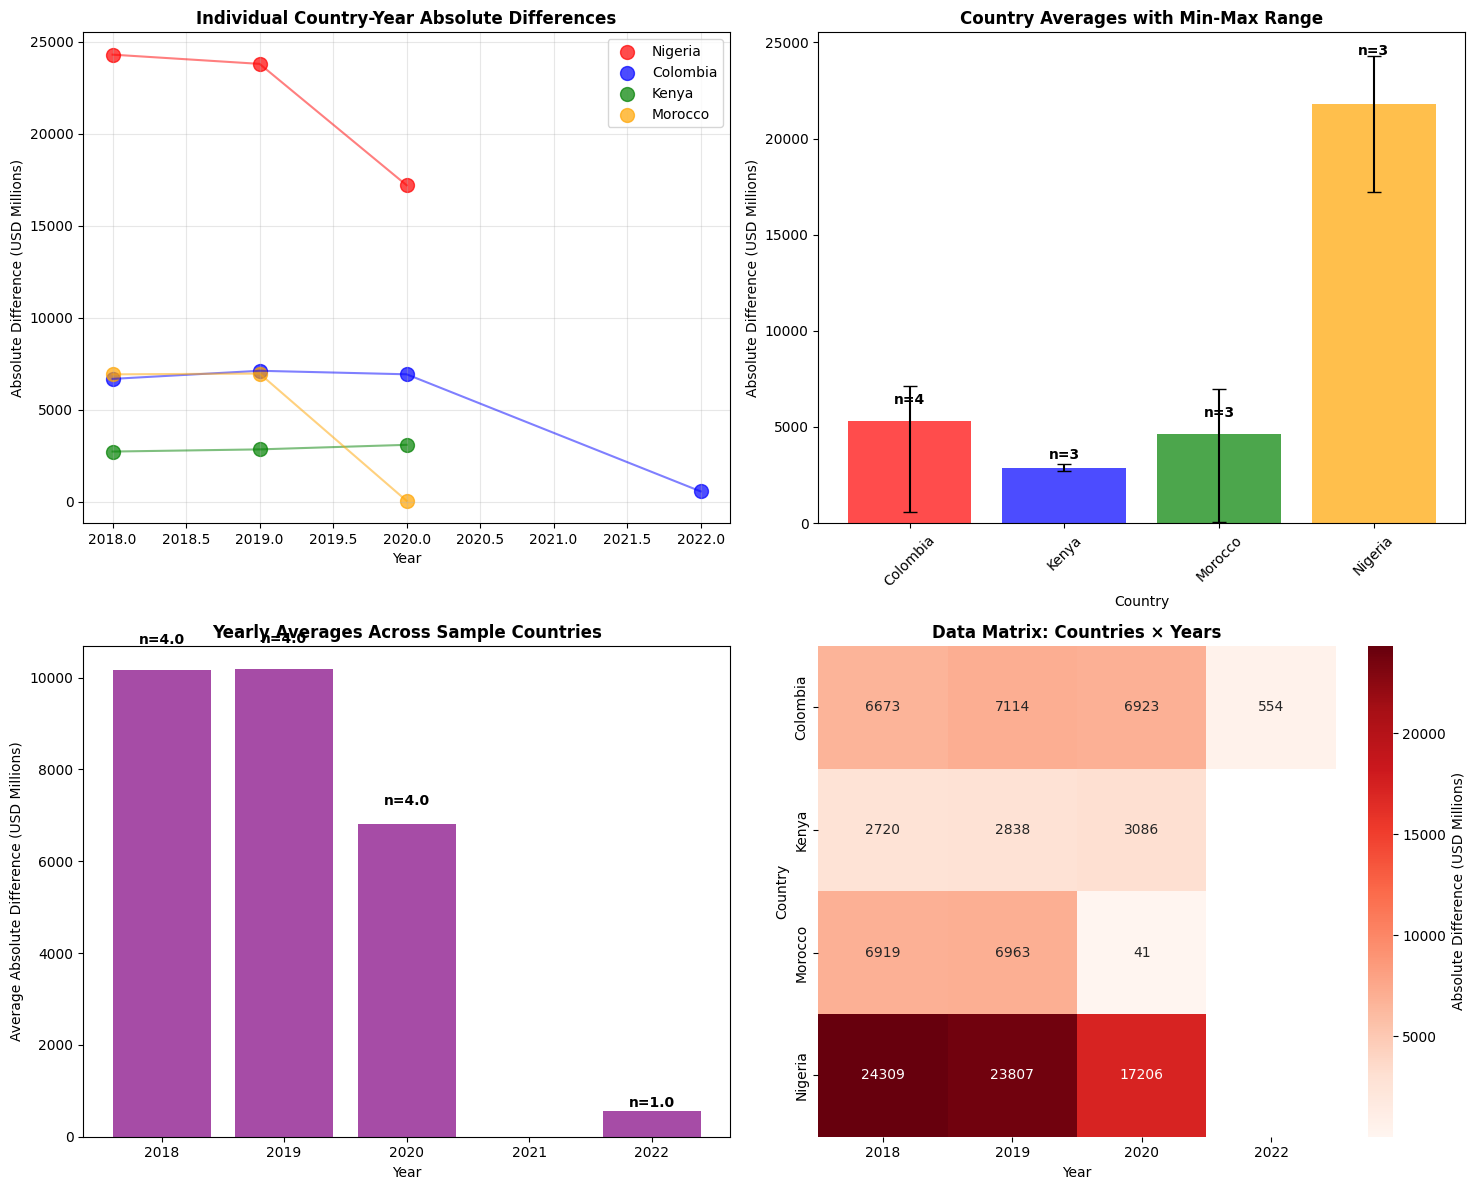


STEP-BY-STEP CALCULATION EXAMPLE

Example: How Nigeria's average absolute difference is calculated:

Nigeria's individual year records:
  2018: |1.82 - 24311.02| = 24309.20
  2019: |1.97 - 23809.28| = 23807.31
  2020: |1.29 - 17207.55| = 17206.26

Calculation: (24309.20 + 23807.31 + 17206.26) / 3
Result: 21774.26 USD millions

KEY POINTS ABOUT TIME DIMENSION HANDLING:
✓ Each country-year combination is treated as a separate observation
✓ Countries with more years get equal weight to those with fewer years
✓ Missing years don't affect the calculation (no imputation)
✓ Time trends can be seen in the individual year data
✓ Country averages smooth out year-to-year variations
✗ Countries with different time coverage may not be directly comparable
✗ Recent vs historical periods might have different data quality


In [57]:
# VISUAL DEMONSTRATION: TIME DIMENSION HANDLING
print("="*60)
print("VISUAL DEMONSTRATION OF TIME HANDLING")
print("="*60)

# Create a visual example with a few countries
sample_countries = ['Nigeria', 'Colombia', 'Kenya', 'Morocco']
sample_data = africa_latam_data[africa_latam_data['Receiving_Country'].isin(sample_countries)].copy()

# Create visualization
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))

# 1. Show individual country-year absolute differences
colors = ['red', 'blue', 'green', 'orange']
for i, country in enumerate(sample_countries):
    country_data = sample_data[sample_data['Receiving_Country'] == country]
    if len(country_data) > 0:
        ax1.scatter(country_data['Year'], country_data['Absolute_Difference'], 
                   s=100, alpha=0.7, label=country, color=colors[i])
        ax1.plot(country_data['Year'], country_data['Absolute_Difference'], 
                color=colors[i], alpha=0.5)

ax1.set_title('Individual Country-Year Absolute Differences', fontsize=12, fontweight='bold')
ax1.set_xlabel('Year')
ax1.set_ylabel('Absolute Difference (USD Millions)')
ax1.legend()
ax1.grid(True, alpha=0.3)

# 2. Show how country averages are calculated (bars showing range)
country_stats = sample_data.groupby('Receiving_Country')['Absolute_Difference'].agg(['mean', 'min', 'max', 'count'])
bars = ax2.bar(range(len(country_stats)), country_stats['mean'], 
               yerr=[country_stats['mean'] - country_stats['min'], 
                     country_stats['max'] - country_stats['mean']], 
               capsize=5, alpha=0.7, color=colors[:len(country_stats)])
ax2.set_title('Country Averages with Min-Max Range', fontsize=12, fontweight='bold')
ax2.set_xlabel('Country')
ax2.set_ylabel('Absolute Difference (USD Millions)')
ax2.set_xticks(range(len(country_stats)))
ax2.set_xticklabels(country_stats.index, rotation=45)

# Add count labels on bars
for i, (bar, count) in enumerate(zip(bars, country_stats['count'])):
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height + country_stats.iloc[i]['max'] * 0.1,
             f'n={count}', ha='center', va='bottom', fontweight='bold')

# 3. Show yearly aggregation
yearly_stats = sample_data.groupby('Year')['Absolute_Difference'].agg(['mean', 'count'])
ax3.bar(yearly_stats.index, yearly_stats['mean'], alpha=0.7, color='purple')
ax3.set_title('Yearly Averages Across Sample Countries', fontsize=12, fontweight='bold')
ax3.set_xlabel('Year')
ax3.set_ylabel('Average Absolute Difference (USD Millions)')

# Add count labels
for year, row in yearly_stats.iterrows():
    ax3.text(year, row['mean'] + row['mean'] * 0.05, f"n={row['count']}", 
             ha='center', va='bottom', fontweight='bold')

# 4. Create a heatmap showing the data structure
pivot_sample = sample_data.pivot(index='Receiving_Country', columns='Year', values='Absolute_Difference')
sns.heatmap(pivot_sample, annot=True, fmt='.0f', cmap='Reds', ax=ax4, 
            cbar_kws={'label': 'Absolute Difference (USD Millions)'})
ax4.set_title('Data Matrix: Countries × Years', fontsize=12, fontweight='bold')
ax4.set_xlabel('Year')
ax4.set_ylabel('Country')

plt.tight_layout()
plt.show()

# Create a summary table showing the calculation process
print("\n" + "="*70)
print("STEP-BY-STEP CALCULATION EXAMPLE")
print("="*70)

print("\nExample: How Nigeria's average absolute difference is calculated:")
nigeria_data = sample_data[sample_data['Receiving_Country'] == 'Nigeria']
if len(nigeria_data) > 0:
    print("\nNigeria's individual year records:")
    for _, row in nigeria_data.iterrows():
        print(f"  {int(row['Year'])}: |{row['Value']:.2f} - {row['IMF_Value_Millions']:.2f}| = {row['Absolute_Difference']:.2f}")
    
    mean_calc = nigeria_data['Absolute_Difference'].mean()
    print(f"\nCalculation: ({' + '.join([f'{x:.2f}' for x in nigeria_data['Absolute_Difference']])}) / {len(nigeria_data)}")
    print(f"Result: {mean_calc:.2f} USD millions")

print(f"\n{'='*70}")
print("KEY POINTS ABOUT TIME DIMENSION HANDLING:")
print("="*70)
print("✓ Each country-year combination is treated as a separate observation")
print("✓ Countries with more years get equal weight to those with fewer years")
print("✓ Missing years don't affect the calculation (no imputation)")
print("✓ Time trends can be seen in the individual year data")
print("✓ Country averages smooth out year-to-year variations")
print("✗ Countries with different time coverage may not be directly comparable")
print("✗ Recent vs historical periods might have different data quality")

In [137]:
# INVESTIGATION: WHY DOES 2024 DATA DISAPPEAR FROM VISUALIZATIONS?
print("="*80)
print("INVESTIGATING: WHERE DOES 2024 DATA DISAPPEAR?")
print("="*80)

# Step 1: Check original data
print("\n🔍 STEP 1: Original data (df)")
print(f"Years in original df: {sorted(df['Year'].unique())}")
print(f"Records with Year = 2024: {len(df[df['Year'] == 2024])}")

# Show some 2024 records
if len(df[df['Year'] == 2024]) > 0:
    print("\nSample 2024 records from original data:")
    sample_2024 = df[df['Year'] == 2024].head()
    print(sample_2024[['Receiving_Country', 'Year', 'Value', 'Region']].to_string(index=False))

# Step 2: Check aggregated data
print(f"\n🔍 STEP 2: Aggregated data (remittances_by_country_year)")
print(f"Years in aggregated data: {sorted(remittances_by_country_year['Year'].unique())}")
print(f"Records with Year = 2024: {len(remittances_by_country_year[remittances_by_country_year['Year'] == 2024])}")

if len(remittances_by_country_year[remittances_by_country_year['Year'] == 2024]) > 0:
    print("\nSample 2024 records from aggregated data:")
    sample_2024_agg = remittances_by_country_year[remittances_by_country_year['Year'] == 2024].head()
    print(sample_2024_agg.to_string(index=False))

# Step 3: Check IMF data
print(f"\n🔍 STEP 3: IMF data (df_imf_wb_long)")
print(f"Years in IMF data: {sorted(df_imf_wb_long['Year'].unique())}")
print(f"Records with Year = 2024: {len(df_imf_wb_long[df_imf_wb_long['Year'] == 2024])}")

if len(df_imf_wb_long[df_imf_wb_long['Year'] == 2024]) > 0:
    print("\nSample 2024 records from IMF data:")
    sample_2024_imf = df_imf_wb_long[df_imf_wb_long['Year'] == 2024].head()
    print(sample_2024_imf[['Country Name', 'Country Code', 'Year', 'IMF_Value']].to_string(index=False))

# Step 4: Check final comparison after merge
print(f"\n🔍 STEP 4: After merge (final_comparison)")
print(f"Years in final_comparison: {sorted(final_comparison['Year'].unique())}")
print(f"Records with Year = 2024: {len(final_comparison[final_comparison['Year'] == 2024])}")

if len(final_comparison[final_comparison['Year'] == 2024]) > 0:
    print("\nSample 2024 records from final_comparison:")
    sample_2024_final = final_comparison[final_comparison['Year'] == 2024].head()
    print(sample_2024_final[['Receiving_Country', 'Year', 'Value', 'IMF_Value_Millions']].to_string(index=False))

# Step 5: Check final dataset
print(f"\n🔍 STEP 5: Final dataset (final_dataset)")
print(f"Years in final_dataset: {sorted(final_dataset['Year'].unique())}")
print(f"Records with Year = 2024: {len(final_dataset[final_dataset['Year'] == 2024])}")

if len(final_dataset[final_dataset['Year'] == 2024]) > 0:
    print("\nSample 2024 records from final_dataset:")
    sample_2024_final_ds = final_dataset[final_dataset['Year'] == 2024].head()
    print(sample_2024_final_ds[['Receiving_Country', 'Year', 'Value', 'IMF_Value_Millions', 'Region']].to_string(index=False))

# Step 6: Check visualization data (viz_data)
print(f"\n🔍 STEP 6: Visualization data (viz_data) - AFTER DROPPING NA VALUES")
print(f"Years in viz_data: {sorted(viz_data['Year'].unique())}")
print(f"Records with Year = 2024: {len(viz_data[viz_data['Year'] == 2024])}")

if len(viz_data[viz_data['Year'] == 2024]) > 0:
    print("\nSample 2024 records from viz_data:")
    sample_2024_viz = viz_data[viz_data['Year'] == 2024].head()
    print(sample_2024_viz[['Receiving_Country', 'Year', 'Value', 'IMF_Value_Millions', 'Region']].to_string(index=False))

print("\n" + "="*80)
print("DIAGNOSIS: WHERE IS 2024 DATA GETTING FILTERED OUT?")
print("="*80)

INVESTIGATING: WHERE DOES 2024 DATA DISAPPEAR?

🔍 STEP 1: Original data (df)
Years in original df: [np.int64(2018), np.int64(2019), np.int64(2020), np.int64(2021), np.int64(2022), np.int64(2024)]
Records with Year = 2024: 33

Sample 2024 records from original data:
Receiving_Country  Year         Value Region
            Kenya  2024 184497.099696 Africa
            Kenya  2024  13169.065146 Africa
            Kenya  2024   1453.632640 Africa
            Kenya  2024   5004.769090 Africa
            Kenya  2024  22844.654998 Africa

🔍 STEP 2: Aggregated data (remittances_by_country_year)
Years in aggregated data: [np.int64(2018), np.int64(2019), np.int64(2020), np.int64(2021), np.int64(2022), np.int64(2024)]
Records with Year = 2024: 1

Sample 2024 records from aggregated data:
Receiving_Country  Year        Value
            Kenya  2024 4.601944e+06

🔍 STEP 3: IMF data (df_imf_wb_long)
Years in IMF data: [np.int64(2018), np.int64(2019), np.int64(2020), np.int64(2021), np.int64(2022), np

In [138]:
# DETAILED 2024 INVESTIGATION: WHY IS IT MISSING FROM VISUALIZATIONS?
print("="*80)
print("FOCUSED INVESTIGATION: 2024 DATA LOSS ANALYSIS")
print("="*80)

# Check if the issue is in the merge step
print("\n🎯 KEY INVESTIGATION: MERGE STEP ANALYSIS")
print("Let's see what happens during the merge between our data and IMF data...")

# Check our data for 2024
our_2024 = remittances_by_country_year[remittances_by_country_year['Year'] == 2024]
print(f"\n📊 Our data for 2024:")
print(f"   Number of countries: {len(our_2024)}")
if len(our_2024) > 0:
    print(f"   Countries: {our_2024['Receiving_Country'].unique()[:10]}...")  # Show first 10
    print(f"   Sample country codes after adding codes:")
    # Check what country codes these get
    our_2024_with_codes = our_2024.merge(country_code_mapping, on='Receiving_Country', how='left')
    print(f"   Sample: {our_2024_with_codes[['Receiving_Country', 'Receiving_Country_Code']].head().to_string(index=False)}")

# Check IMF data for 2024
imf_2024 = df_imf_wb_long[df_imf_wb_long['Year'] == 2024]
print(f"\n📊 IMF data for 2024:")
print(f"   Number of records: {len(imf_2024)}")
if len(imf_2024) > 0:
    print(f"   Number of unique countries: {imf_2024['Country Code'].nunique()}")
    print(f"   Sample country codes: {imf_2024['Country Code'].unique()[:10]}")  # Show first 10
    print(f"   Has non-null values: {imf_2024['IMF_Value'].notna().sum()}")

# Check the merge result specifically for 2024
print(f"\n🔍 MERGE ANALYSIS FOR 2024:")
if len(our_2024) > 0:
    our_2024_with_codes = remittances_with_codes[remittances_with_codes['Year'] == 2024]
    print(f"   Our 2024 data with codes: {len(our_2024_with_codes)} records")
    
    # Try a test merge to see what happens
    test_merge_2024 = our_2024_with_codes.merge(
        df_imf_wb_long[['Country Code', 'Year', 'IMF_Value']],
        left_on=['Receiving_Country_Code', 'Year'],
        right_on=['Country Code', 'Year'],
        how='left'
    )
    print(f"   After merge: {len(test_merge_2024)} records")
    print(f"   Records with IMF data: {test_merge_2024['IMF_Value'].notna().sum()}")
    print(f"   Records without IMF data: {test_merge_2024['IMF_Value'].isna().sum()}")

# The key insight: viz_data filters out records without IMF data
print(f"\n🚨 KEY FINDING: viz_data Creation")
print("The viz_data is created with: viz_data = final_dataset.dropna(subset=['IMF_Value_Millions'])")
print("This means ANY 2024 records without matching IMF data get dropped!")

# Check if 2024 records have IMF matches
final_2024 = final_dataset[final_dataset['Year'] == 2024]
if len(final_2024) > 0:
    print(f"\n📋 2024 Records in final_dataset:")
    print(f"   Total 2024 records: {len(final_2024)}")
    print(f"   With IMF data: {final_2024['IMF_Value_Millions'].notna().sum()}")
    print(f"   Without IMF data: {final_2024['IMF_Value_Millions'].isna().sum()}")
    
    # Show some examples of countries missing IMF data
    missing_imf = final_2024[final_2024['IMF_Value_Millions'].isna()]
    if len(missing_imf) > 0:
        print(f"\n   Countries missing IMF data in 2024:")
        print(missing_imf[['Receiving_Country', 'Receiving_Country_Code', 'Region']].head(10).to_string(index=False))

print(f"\n💡 SOLUTION SUMMARY:")
print("2024 data disappears because:")
print("1. ✅ 2024 exists in our remittance data") 
print("2. ❓ 2024 may or may not exist in IMF data")
print("3. ❌ Records without IMF matches get dropped by viz_data = final_dataset.dropna()")
print("4. 🎯 To fix: Either include 2024 IMF data or modify filtering logic")

FOCUSED INVESTIGATION: 2024 DATA LOSS ANALYSIS

🎯 KEY INVESTIGATION: MERGE STEP ANALYSIS
Let's see what happens during the merge between our data and IMF data...

📊 Our data for 2024:
   Number of countries: 1
   Countries: ['Kenya']...
   Sample country codes after adding codes:
   Sample: Receiving_Country Receiving_Country_Code
            Kenya                    KEN

📊 IMF data for 2024:
   Number of records: 154
   Number of unique countries: 154
   Sample country codes: ['AFE' 'AFW' 'AGO' 'ALB' 'ARB' 'ARG' 'ARM' 'ATG' 'AUS' 'AUT']
   Has non-null values: 154

🔍 MERGE ANALYSIS FOR 2024:
   Our 2024 data with codes: 1 records
   After merge: 1 records
   Records with IMF data: 0
   Records without IMF data: 1

🚨 KEY FINDING: viz_data Creation
The viz_data is created with: viz_data = final_dataset.dropna(subset=['IMF_Value_Millions'])
This means ANY 2024 records without matching IMF data get dropped!

📋 2024 Records in final_dataset:
   Total 2024 records: 1
   With IMF data: 0
   

In [139]:
# FINAL DIAGNOSIS: WHY KENYA 2024 DOESN'T MATCH IMF DATA
print("="*80)
print("ROOT CAUSE ANALYSIS: KENYA 2024 MATCHING ISSUE")
print("="*80)

# Check if Kenya (KEN) exists in 2024 IMF data
print("🔍 Checking if Kenya (KEN) exists in 2024 IMF data...")
kenya_2024_imf = df_imf_wb_long[(df_imf_wb_long['Country Code'] == 'KEN') & (df_imf_wb_long['Year'] == 2024)]
print(f"Kenya 2024 in IMF data: {len(kenya_2024_imf)} records")

if len(kenya_2024_imf) > 0:
    print("✅ Kenya 2024 EXISTS in IMF data:")
    print(kenya_2024_imf[['Country Name', 'Country Code', 'Year', 'IMF_Value']].to_string(index=False))
else:
    print("❌ Kenya 2024 MISSING from IMF data")
    
    # Check what years Kenya has in IMF data
    kenya_imf_years = df_imf_wb_long[df_imf_wb_long['Country Code'] == 'KEN']['Year'].unique()
    print(f"Kenya years available in IMF data: {sorted(kenya_imf_years)}")

# Check what country codes exist in IMF 2024 data
print(f"\n🔍 What countries ARE in 2024 IMF data?")
imf_2024_countries = df_imf_wb_long[df_imf_wb_long['Year'] == 2024][['Country Name', 'Country Code']].drop_duplicates()
print(f"Number of countries in IMF 2024: {len(imf_2024_countries)}")
print("Sample countries in IMF 2024:")
print(imf_2024_countries.head(10).to_string(index=False))

# Let's also check if there are any variations of Kenya
kenya_variants = imf_2024_countries[imf_2024_countries['Country Name'].str.contains('Kenya', case=False, na=False)]
print(f"\nCountries containing 'Kenya' in 2024 IMF data:")
if len(kenya_variants) > 0:
    print(kenya_variants.to_string(index=False))
else:
    print("None found")

print("\n" + "="*80)
print("CONCLUSIONS & SOLUTIONS")
print("="*80)

print("\n🎯 ROOT CAUSE:")
print("Kenya 2024 data exists in our remittance data but NOT in the IMF reference data.")
print("The IMF dataset may not have 2024 data for Kenya, or Kenya might be coded differently.")

print("\n💡 POSSIBLE SOLUTIONS:")
print("1. ✅ ACCEPT: 2024 only has partial coverage - this is normal for recent data")
print("2. 🔄 UPDATE: Get newer IMF data that includes 2024 values")
print("3. 🔀 MODIFY: Change filtering to show countries even without IMF matches")
print("4. 📊 DOCUMENT: Add note that 2024 has limited IMF comparison data")

print("\n📈 RECOMMENDATION:")
print("This is likely normal - IMF reference data often lags by 1-2 years.")
print("Consider adding a note to visualizations about data availability by year.")

ROOT CAUSE ANALYSIS: KENYA 2024 MATCHING ISSUE
🔍 Checking if Kenya (KEN) exists in 2024 IMF data...
Kenya 2024 in IMF data: 0 records
❌ Kenya 2024 MISSING from IMF data
Kenya years available in IMF data: [np.int64(2018), np.int64(2019), np.int64(2020), np.int64(2021), np.int64(2022), np.int64(2023)]

🔍 What countries ARE in 2024 IMF data?
Number of countries in IMF 2024: 154
Sample countries in IMF 2024:
               Country Name Country Code
Africa Eastern and Southern          AFE
 Africa Western and Central          AFW
                     Angola          AGO
                    Albania          ALB
                 Arab World          ARB
                  Argentina          ARG
                    Armenia          ARM
        Antigua and Barbuda          ATG
                  Australia          AUS
                    Austria          AUT

Countries containing 'Kenya' in 2024 IMF data:
None found

CONCLUSIONS & SOLUTIONS

🎯 ROOT CAUSE:
Kenya 2024 data exists in our remittance d